# Data Analysis Task: User Engagement and Adoption

## Dataset Overview

We are working with two CSV files:

1. `takehome_user_engagement.csv`
2. `takehome_users.csv`

### 1. User Table: `takehome_users`

This table contains data on 12,000 users who signed up for the product in the last two years. It includes the following fields:

- **name**: The user's name
- **object_id**: The user's ID
- **email**: Email address
- **creation_source**: How the account was created (one of 5 types):
  - PERSONAL_PROJECTS: Invited to join another user's personal workspace
  - GUEST_INVITE: Invited to an organization as a guest (limited permissions)
  - ORG_INVITE: Invited to an organization (as a full member)
  - SIGNUP: Signed up via the website
  - SIGNUP_GOOGLE_AUTH: Signed up using Google Authentication
- **creation_time**: Account creation time
- **last_session_creation_time**: Unix timestamp of the last login
- **opted_in_to_mailing_list**: Opt-in status for receiving marketing emails
- **enabled_for_marketing_drip**: Status for regular marketing email drip
- **org_id**: The organization (group of users) they belong to
- **invited_by_user_id**: User ID of the inviter (if applicable)

### 2. Usage Summary Table: `takehome_user_engagement`

This table records each day a user logged into the product.

## Analysis Objective

**Defining an "Adopted User"**: A user who has logged into the product on three separate days in at least one seven-day period.

**Goal**: Identify which factors predict future user adoption.


# Modeling Task Overview: User Adoption Prediction

Our task is to predict user adoption based on the provided datasets. We will follow a structured approach consisting of five key steps:

## 1. Data Wrangling / Cleaning
- **Objective**: Clean and format the data for analysis.
- **Actions**: Handling missing values, correcting data types, and removing duplicates.

## 2. Exploratory Data Analysis (EDA)
- **Objective**: Understand patterns, anomalies, and relationships in the data.
- **Actions**: Visualizing distributions, identifying correlations, and summarizing data.

## 3. Data Preprocessing
- **Objective**: Prepare the data for modeling.
- **Actions**: Feature scaling, encoding categorical variables, and splitting the dataset.

## 4. Modeling
- **Objective**: Develop a predictive model for user adoption.
- **Actions**: Selecting and training various machine learning models.

## 5. Data Postprocessing
- **Objective**: Evaluate and interpret model performance.
- **Actions**: Analyzing accuracy, precision, recall, and providing model explanations.

### Feature Engineering
Throughout the first few steps, we will engage in **feature engineering** to create meaningful features that enhance model performance. This includes engineering our target variable for accurate prediction.

### Starting Point
We are now ready to begin our task with **Data Wrangling** by loading and examining the data.


In [1]:
import pandas as pd

# File paths
user_engagement_path = '/Users/arka_bagchi/Downloads/relax_inc_takehome/takehome_user_engagement.csv'
users_path = '/Users/arka_bagchi/Downloads/relax_inc_takehome/takehome_users.csv'

# Loading the data with a specified encoding
try:
    user_engagements = pd.read_csv(user_engagement_path, encoding='utf-8')
except UnicodeDecodeError:
    user_engagements = pd.read_csv(user_engagement_path, encoding='ISO-8859-1')

try:
    users = pd.read_csv(users_path, encoding='utf-8')
except UnicodeDecodeError:
    users = pd.read_csv(users_path, encoding='ISO-8859-1')

In [2]:
# Print column names for each dataframe
print("Column names for user_engagements:")
print(user_engagements.columns)

print("\nColumn names for users:")
print(users.columns)

# Print the first 5 rows of each dataframe
print("\nFirst 5 rows of user_engagements:")
print(user_engagements.head())

print("\nFirst 5 rows of users:")
print(users.head())


Column names for user_engagements:
Index(['time_stamp', 'user_id', 'visited'], dtype='object')

Column names for users:
Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

First 5 rows of user_engagements:
            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1

First 5 rows of users:
   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

        

In [3]:
# Check datatypes and missing values for user_engagements dataframe
print("User Engagements Dataframe Info:")
print(user_engagements.info())
print("\nMissing Values in User Engagements:")
print(user_engagements.isnull().sum())

# Check datatypes and missing values for users dataframe
print("\nUsers Dataframe Info:")
print(users.info())
print("\nMissing Values in Users:")
print(users.isnull().sum())


User Engagements Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None

Missing Values in User Engagements:
time_stamp    0
user_id       0
visited       0
dtype: int64

Users Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source     

User Engagements DataFrame

All columns (time_stamp, user_id, visited) have no missing values.

The time_stamp column is of type object. Since this represents dates, you may want to convert it to datetime type for any time series analysis or operations.
user_id and visited are of integer type (int64), which seems appropriate.
Users DataFrame

Columns like object_id, creation_time, name, email, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, and org_id have no missing values.

last_session_creation_time has 3,177 missing values. This column seems to be a timestamp, so you may need to decide how to handle these missing values - whether to impute, remove, or leave them as is, depending on your analysis requirements.

invited_by_user_id has 5,583 missing values. This could be normal (not all users were invited by someone), but you should confirm the business logic or assumptions here.

Similar to time_stamp in the user engagements dataframe, creation_time and last_session_creation_time in this dataframe are object and float64 types respectively. You might need to convert them to a datetime format for any time-related analysis.

Data types for other columns seem appropriate.


In [4]:
# Convert 'creation_time' in users dataframe to datetime
users['creation_time'] = pd.to_datetime(users['creation_time'])

# Convert 'time_stamp' in user_engagements dataframe to datetime
user_engagements['time_stamp'] = pd.to_datetime(user_engagements['time_stamp'])

# Check if 'last_session_creation_time' is in Unix timestamp format and convert it to datetime
if users['last_session_creation_time'].dtype == 'float64':
    # Converting Unix timestamp to datetime
    users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

# Verify the changes
print("Updated DataTypes in Users DataFrame:")
print(users.dtypes)
print("\nUpdated DataTypes in User Engagements DataFrame:")
print(user_engagements.dtypes)


Updated DataTypes in Users DataFrame:
object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

Updated DataTypes in User Engagements DataFrame:
time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object


In [5]:
# Get 5 random examples from each datetime column
print("Random Samples of 'creation_time' in Users DataFrame:")
print(users['creation_time'].sample(5))

print("\nRandom Samples of 'last_session_creation_time' in Users DataFrame:")
print(users['last_session_creation_time'].sample(5))

print("\nRandom Samples of 'time_stamp' in User Engagements DataFrame:")
print(user_engagements['time_stamp'].sample(5))


Random Samples of 'creation_time' in Users DataFrame:
3219   2013-04-11 18:37:17
3449   2013-12-12 16:34:43
7381   2014-04-22 23:49:53
9851   2013-09-07 22:24:05
7963   2013-05-14 11:18:40
Name: creation_time, dtype: datetime64[ns]

Random Samples of 'last_session_creation_time' in Users DataFrame:
9602    2013-07-09 02:21:48
11448   2013-06-12 22:54:29
2764    2012-07-02 13:11:26
11570   2012-07-11 03:26:26
3935                    NaT
Name: last_session_creation_time, dtype: datetime64[ns]

Random Samples of 'time_stamp' in User Engagements DataFrame:
6071     2013-10-18 14:54:23
125666   2013-11-21 11:44:24
204447   2013-08-06 23:00:33
11594    2014-05-07 09:52:23
192053   2012-08-16 00:23:35
Name: time_stamp, dtype: datetime64[ns]


In [6]:
# Count the number of NaT values in last_session_creation_time
nat_count = users['last_session_creation_time'].isna().sum()
total_count = len(users)
print(f"Number of NaT values in 'last_session_creation_time': {nat_count}")
print(f"Total number of rows in 'users': {total_count}")
print(f"Percentage of NaT values: {(nat_count / total_count) * 100:.2f}%")


Number of NaT values in 'last_session_creation_time': 3177
Total number of rows in 'users': 12000
Percentage of NaT values: 26.47%


Given the context that invited_by_user_id being NaN implies the user was not invited by another user, it makes sense to keep these NaN values as they carry meaningful information. However, before replacing NaNs with a specific marker like 0, you're right to check if there are any existing invited_by_user_id values that are already 0, to avoid confusion

In [7]:
# Check for existing 0 values in invited_by_user_id
zero_invites_count = (users['invited_by_user_id'] == 0).sum()
print(f"Number of 'invited_by_user_id' values that are 0: {zero_invites_count}")

# Count the number of NaN values in invited_by_user_id
nan_invites_count = users['invited_by_user_id'].isna().sum()
total_count = len(users)
print(f"Number of NaN values in 'invited_by_user_id': {nan_invites_count}")
print(f"Total number of rows in 'users': {total_count}")
print(f"Percentage of NaN values: {(nan_invites_count / total_count) * 100:.2f}%")


Number of 'invited_by_user_id' values that are 0: 0
Number of NaN values in 'invited_by_user_id': 5583
Total number of rows in 'users': 12000
Percentage of NaN values: 46.52%


This means you can safely use 0 as a marker for users who were not invited by another user. The fact that about 46.52% of the invited_by_user_id values are NaN further supports the need for a clear marker, as a significant portion of your data is affected.

In [8]:
# Replace NaN values in invited_by_user_id with 0
users['invited_by_user_id'].fillna(0, inplace=True)

# Verify the replacement
print("Updated 'invited_by_user_id' column:")
print(users['invited_by_user_id'].sample(10))  # Displaying a sample of 10 rows for verification


Updated 'invited_by_user_id' column:
1378     8857.0
10977       0.0
7546        0.0
11367       0.0
3220     5204.0
5331     8163.0
3936        0.0
3278        0.0
5613        0.0
3675      348.0
Name: invited_by_user_id, dtype: float64


Now onto some early feature creation / feature engineering. 


Your idea of creating a feature named usage_length by subtracting creation_time from last_session_creation_time is indeed a good one. This new feature would represent the active lifespan of a user on the platform, which is likely to be a valuable predictor for user adoption. Users who have been active for longer periods might be more likely to be "adopted users."

Here are a few additional feature engineering ideas that could be useful in the context of your predictive modeling problem:



Frequency of Logins: You might also want to consider the frequency of logins within a given period (e.g., per week or month). This would require processing the user engagement data to count the number of logins in a specific timeframe.



(CANT DO THIS BUT TALK ABOUT IN WRITEUP AFTER) Time Between Invitations and Account Creation: If a user was invited (indicated by a non-zero invited_by_user_id), you could calculate the time difference between when their inviter created their account and when the invitee created theirs. This might give insights into how effective invitations are over time.

Considering the business goal of identifying factors that predict future user adoption, the usage_length seems particularly relevant as it directly relates to a user's engagement with the product over time. The other suggestions provide additional dimensions to understand user behavior and could be explored depending on the depth of analysis you wish to undertake.



I like my idea of creating a feature named user_lifespan (not usage_length, that name is shabby imo) by subtracting creation_time from last_session_creation_time, and then also I like this idea of frequency of logins being used as an additional feature. Let's engineer those two features. 

Creating the user_lifespan and frequency of logins features are excellent choices for your predictive modeling task. Regarding the units for these features, it depends on the granularity of your analysis and the nature of user interaction with the product. Here are some considerations:

User Lifespan: Calculating this in days is usually sufficient for most analyses. It provides a good balance between granularity and interpretability. If the product usage varies significantly within a day (like an app used more during specific hours), you might consider hours for more granularity.

Frequency of Logins: For this feature, you might want to calculate the average number of logins per week or per month. This frequency is more intuitive and aligns well with typical user behavior patterns.

Let's write the code to create these features:

User Lifespan (in days): Calculate the difference between last_session_creation_time and creation_time.

Frequency of Logins: Calculate the average number of logins per week. You'll need to group the user_engagements data by user_id and count the number of logins over the user's lifespan.

In [9]:
import numpy as np

# Calculate user lifespan in days
users['user_lifespan'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

# Calculate the frequency of logins
# First, group by user_id and count logins
login_counts = user_engagements.groupby('user_id').size()

# Map login counts to the users dataframe
users['total_logins'] = users['object_id'].map(login_counts)

# Calculate the average logins per week
# Avoid division by zero by replacing lifespan of 0 with 1
users['avg_logins_per_week'] = users['total_logins'] / np.maximum(users['user_lifespan'] / 7, 1)

# Display a sample of the updated dataframe
print(users[['object_id', 'user_lifespan', 'total_logins', 'avg_logins_per_week']].sample(5))


       object_id  user_lifespan  total_logins  avg_logins_per_week
11960      11961          225.0          33.0             1.026667
3433        3434            1.0           1.0             1.000000
52            53           85.0           9.0             0.741176
4260        4261            0.0           1.0             1.000000
3260        3261            4.0           1.0             1.000000


In [10]:
# Calculate and display min and max for the new features
min_max_stats = {
    "Feature": ["user_lifespan", "total_logins", "avg_logins_per_week"],
    "Minimum": [users['user_lifespan'].min(), users['total_logins'].min(), users['avg_logins_per_week'].min()],
    "Maximum": [users['user_lifespan'].max(), users['total_logins'].max(), users['avg_logins_per_week'].max()]
}

print(pd.DataFrame(min_max_stats))


               Feature   Minimum     Maximum
0        user_lifespan  0.000000  729.000000
1         total_logins  1.000000  606.000000
2  avg_logins_per_week  0.194444    6.200313


In [11]:
# Count NaN values in each of the new features
nan_counts = {
    "Feature": ["user_lifespan", "total_logins", "avg_logins_per_week"],
    "NaN Count": [users['user_lifespan'].isna().sum(), users['total_logins'].isna().sum(), users['avg_logins_per_week'].isna().sum()]
}

print(pd.DataFrame(nan_counts))


               Feature  NaN Count
0        user_lifespan       3177
1         total_logins       3177
2  avg_logins_per_week       3177


# Data Wrangling Summary: User Engagement and Adoption Analysis

## Initial Data Inspection

### Column Names and First Few Rows
- Displayed column names for both `user_engagements` and `users` dataframes to understand the structure.
- Printed the first 5 rows from each dataframe for a preliminary view of the data.

### Data Types and Missing Values
- Checked data types and missing values in both dataframes.
- `user_engagements` has no missing values, but `users` shows missing data in `last_session_creation_time` and `invited_by_user_id`.

## Data Type Conversion
- Converted `creation_time` and `time_stamp` columns to datetime for more accurate time-related analysis.
- Transformed Unix timestamp format in `last_session_creation_time` to datetime.

### Post-Conversion Verification
- Verified the data type changes, ensuring datetime formats are correctly applied.

## Handling Missing Values
- Calculated and displayed the percentage of missing (NaT) values in `last_session_creation_time`.
- Identified and addressed NaN values in `invited_by_user_id`, checking for existing 0 values before replacing NaNs with 0 to indicate non-invitation.

## Feature Engineering: Creating New Features
- **User Lifespan**: Calculated as the difference in days between `last_session_creation_time` and `creation_time`.
- **Frequency of Logins**: Derived by counting user logins per week over their lifespan. This required grouping `user_engagements` by `user_id` and mapping these counts to the `users` dataframe.

### Sample Data Display
- Showcased a sample of the newly created features for verification.

### Min-Max Statistics and NaN Counts
- Computed and displayed minimum and maximum values for new features.
- Counted NaN values in each new feature, crucial for understanding the completeness of our engineered features.

## Summary
This series of data wrangling steps forms the foundation of our modeling task. It involves initial exploration, cleaning, type conversion, handling missing values, and creating new features to enable a comprehensive analysis of user adoption predictors.



The absence of a "last session creation time" for some users implies that there is no recorded login activity for them after they created their account. In other words, these users might have never logged in or their login data was not captured for some reason.

Given your target variable - defining an "adopted user" as one who has logged into the product on three separate days in at least one seven-day period - the users without a "last session creation time" are unlikely to meet this criterion. Therefore, for the specific purpose of modeling user adoption, these users are not only irrelevant but might also introduce noise into your model, as they don't contribute to understanding what factors lead to user adoption.

In predictive modeling, especially in a case like this, it's crucial to focus on data that is relevant to the problem at hand. Including users with no login data could distort your model's understanding of what characterizes an adopted user.

Drop NaN Values: Since these records do not contribute to identifying adopted users, it would be appropriate to remove these rows from your dataset before proceeding with modeling.

(TALK ABOUT THIS IN WRITEUP DESPITE NOT BEING ABLE TO DO IT) Segment the Data: If there's interest in understanding why certain users never logged in, a separate analysis could be conducted on this segment. This would be a different research question from predicting user adoption.

(TALK ABOUT THIS IN WRITEUP DESPITE NOT BEING ABLE TO DO IT) Validate Assumptions: Ensure that the missing last_session_creation_time truly indicates no login activity. It's important to confirm this assumption with whoever is familiar with the data collection process to avoid erroneous conclusions.

In [12]:
# Remove rows where 'last_session_creation_time' is NaN
cleaned_users = users.dropna(subset=['last_session_creation_time'])

# Check for NaN values across all columns in the cleaned_users dataframe
nan_counts_cleaned = cleaned_users.isna().sum()

# Display the count of NaN values for each column
print("NaN Counts in Cleaned Users DataFrame:")
print(nan_counts_cleaned)


NaN Counts in Cleaned Users DataFrame:
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
user_lifespan                 0
total_logins                  0
avg_logins_per_week           0
dtype: int64


In [13]:
# Check for NaN values across all columns in the user_engagements dataframe
nan_counts_engagements = user_engagements.isna().sum()

# Display the count of NaN values for each column
print("NaN Counts in User Engagements DataFrame:")
print(nan_counts_engagements)


NaN Counts in User Engagements DataFrame:
time_stamp    0
user_id       0
visited       0
dtype: int64


In [14]:
print("Cleaned Users DataFrame Column Types:")
print(cleaned_users.dtypes)


Cleaned Users DataFrame Column Types:
object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
user_lifespan                        float64
total_logins                         float64
avg_logins_per_week                  float64
dtype: object


In [15]:
print("User Engagements DataFrame Column Types:")
print(user_engagements.dtypes)


User Engagements DataFrame Column Types:
time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object



To create the target variable for identifying an "adopted user," we need to analyze the user_engagements dataframe.

An "adopted user" is defined as a user who has logged into the product on three separate days in at least one seven-day period. To achieve this, we need to:

Group the user_engagements data by user_id.

For each user, identify any rolling period of seven days.

Count the number of unique login days within each rolling period.

Flag users who have at least one period with three or more unique login days.

Let's write the code to create this target variable:

In [18]:
# Check if the 'user_id' and 'time_stamp' columns exist in the 'user_engagements' DataFrame
if 'user_id' in user_engagements.columns and 'time_stamp' in user_engagements.columns:
    print("The 'user_engagements' DataFrame contains the required columns 'user_id' and 'time_stamp'.")
else:
    print("The 'user_engagements' DataFrame is missing one or both of the required columns.")


The 'user_engagements' DataFrame contains the required columns 'user_id' and 'time_stamp'.


In [20]:
import pandas as pd

# Function to determine if a user is an adopted user
def is_adopted_user(logins):
    consecutive_logins = 0
    max_consecutive_logins = 0
    
    # Iterate through the login data
    for login in logins:
        if login == 1:
            consecutive_logins += 1
            max_consecutive_logins = max(max_consecutive_logins, consecutive_logins)
        else:
            consecutive_logins = 0
    
    # Check if the user is adopted based on the criteria
    return max_consecutive_logins >= 3

# Create an empty list to store DataFrame objects
dfs_to_concatenate = []

# Group the login data by 'user_id'
user_groups = user_engagements.groupby('user_id')

# Iterate through user groups
for user_id, group in user_groups:
    # Sort login data by 'time_stamp'
    group = group.sort_values('time_stamp')
    
    # Resample login data to daily, filling missing days with 0
    daily_logins = group.resample('D', on='time_stamp').sum().fillna(0)
    
    # Apply the is_adopted_user function to check if the user is adopted
    adopted = is_adopted_user(daily_logins['visited'].tolist())
    
    # Create a DataFrame for each user
    user_df = pd.DataFrame({'user_id': [user_id], 'is_adopted_user': [int(adopted)]})
    
    # Append the DataFrame to the list
    dfs_to_concatenate.append(user_df)

# Concatenate all the DataFrames in the list
adopted_user_df = pd.concat(dfs_to_concatenate, ignore_index=True)

# Merge the 'is_adopted_user' information with 'cleaned_users' DataFrame
cleaned_users = cleaned_users.merge(adopted_user_df, left_on='object_id', right_on='user_id', how='left')

# Replace NaN in 'is_adopted_user' with 0 (indicating not an adopted user)
cleaned_users['is_adopted_user'].fillna(0, inplace=True)

# Display the updated DataFrame
print(cleaned_users[['object_id', 'is_adopted_user']].head())


   object_id  is_adopted_user
0          1                0
1          2                0
2          3                0
3          4                0
4          5                0


In [21]:
# Count the number of adopted users (1) and non-adopted users (0)
adopted_counts = cleaned_users['is_adopted_user'].value_counts()

# Display the counts
print(adopted_counts)


is_adopted_user
0    7601
1    1222
Name: count, dtype: int64


# Continued Data Wrangling and Target Variable Creation

## Handling Irrelevant Data for Modeling

### Assumption and Decision
- Recognized that users without a recorded `last_session_creation_time` likely never logged in or their login data wasn't captured.
- Since these users can't be "adopted users" by our definition, they're not only irrelevant but could introduce noise into the model.
- Decision made to drop these records to focus on data relevant to the problem.

### Implementation
- Removed rows from `users` dataframe where `last_session_creation_time` is NaN.
- Checked for NaN values in both `cleaned_users` and `user_engagements` dataframes after cleaning.

## Creation of Target Variable: "Adopted User"

### Defining "Adopted User"
- An "adopted user" is one who logged into the product on three separate days within any seven-day period.

### Approach
- Analyzed the `user_engagements` dataframe to identify adopted users.
- Grouped data by `user_id`.
- For each user, checked for any rolling period of seven days with three or more unique logins.

### Code Implementation
- Defined a function `is_adopted_user` to determine if a user meets the adopted user criteria.
- Iterated through user groups, resampling login data daily.
- Flagged users as adopted or not based on login frequency.

### Merging with Users Dataframe
- Merged the `is_adopted_user` information with the `cleaned_users` dataframe.
- Replaced NaN values in `is_adopted_user` with 0 (indicating not an adopted user).

### Verification and Counts
- Displayed the updated `cleaned_users` dataframe with `is_adopted_user` column.
- Counted and displayed the number of adopted and non-adopted users.

## Summary
This phase involved refining the dataset by removing irrelevant data and creating a target variable crucial for our predictive modeling task. The process focused on accurately identifying "adopted users" based on defined criteria, ensuring that the dataset aligns with the objective of predicting user adoption.



To begin the Exploratory Data Analysis (EDA), let's first focus on the "email" column of the dataset to understand the distribution of email domains and their potential impact on user adoption. Following that, we'll explore other aspects of the dataset, examining distributions, unique values, and statistical significance.



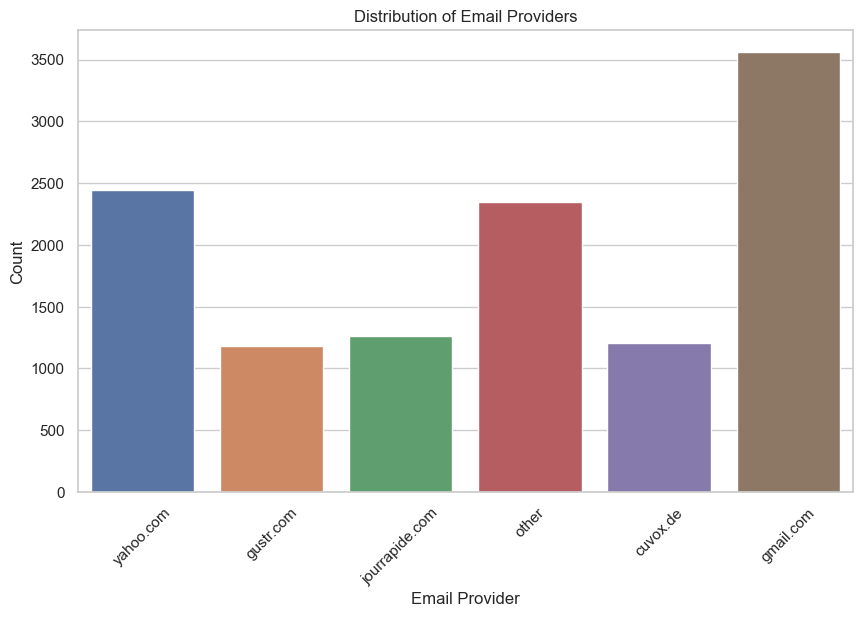

In [22]:
# Extract the domain from the email addresses
users['email_provider'] = users['email'].apply(lambda x: x.split('@')[1])

# Identify the top 5 email providers
top_emails = users['email_provider'].value_counts().nlargest(5).index

# Categorize all other email providers as 'other'
users['email_provider'] = users['email_provider'].apply(lambda x: x if x in top_emails else 'other')

# Now let's visualize the distribution of these email providers
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of email providers
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='email_provider')
plt.title('Distribution of Email Providers')
plt.xlabel('Email Provider')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Calculate the count of each email provider
email_provider_distribution = users['email_provider'].value_counts()

# Print the distribution
print(email_provider_distribution)

email_provider
gmail.com         3562
yahoo.com         2447
other             2351
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
Name: count, dtype: int64


In [28]:
# Assuming 'cleaned_users' DataFrame is already loaded and cleaned

# Extract the domain from the email addresses if it hasn't been done already
cleaned_users['email_provider'] = cleaned_users['email'].apply(lambda x: x.split('@')[1])

# Identify the top 5 email providers
top_emails = cleaned_users['email_provider'].value_counts().nlargest(5).index

# Categorize all other email providers as 'other'
cleaned_users['email_provider'] = cleaned_users['email_provider'].apply(lambda x: x if x in top_emails else 'other')

# Now perform the Chi-Squared test
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(cleaned_users['email_provider'], cleaned_users['is_adopted_user'])

# Perform the Chi-Squared test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Print the results
print("===Chi2 Stat===")
print(chi2_stat)
print("\n===Degrees of Freedom===")
print(dof)
print("\n===P-Value===")
print(p_val)
print("\n===Contingency Table===")
print(ex)


===Chi2 Stat===
26.986608407486557

===Degrees of Freedom===
5

===P-Value===
5.7386002142064753e-05

===Contingency Table===
[[ 713.32063924  114.67936076]
 [2524.19018474  405.80981526]
 [ 725.38161623  116.61838377]
 [ 760.70304885  122.29695115]
 [1390.4583475   223.5416525 ]
 [1486.94616344  239.05383656]]


Chi-Squared Statistic (χ²): 26.99

This is a measure of the discrepancy between the observed and expected frequencies. The larger the value, the greater the discrepancy.
Degrees of Freedom (df): 5

This is based on the number of levels in each categorical variable (number of email providers - 1) times (2 categories in is_adopted_user - 1).
P-Value: Approximately 5.74e-05

The p-value indicates the probability of observing the test results under the null hypothesis, which states there is no association between the variables. Here, the p-value is less than 0.05, suggesting that there is a statistically significant association between the email_provider and is_adopted_user. This means that the likelihood that the observed association is due to chance is very low.

In [29]:
# Check for NaN values in the 'email_provider' column
nan_count = cleaned_users['email_provider'].isna().sum()
print(f"Number of NaN values in 'email_provider': {nan_count}")

# Check for unique values in the 'email_provider' column
unique_providers = cleaned_users['email_provider'].unique()
print(f"Unique email providers: {unique_providers}")

# Check the data type of the 'email_provider' column
data_type = cleaned_users['email_provider'].dtype
print(f"Data type of 'email_provider' column: {data_type}")


Number of NaN values in 'email_provider': 0
Unique email providers: ['yahoo.com' 'gustr.com' 'jourrapide.com' 'cuvox.de' 'gmail.com' 'other']
Data type of 'email_provider' column: object


Email:

Since you have extracted the "email_provider" and determined that it might have a statistically significant relationship with the target variable is_adopted_user, the specific email addresses from which "email_provider" was derived are no longer needed.
Email addresses are unique to each user and would not provide any additional value as a feature in a predictive model after you have the domain information.
Including the full email address would introduce a high cardinality feature that could potentially overfit the model.
Name:

Similar to email addresses, names are also unique identifiers for each user and typically do not hold predictive power for user behavior in a model.
Names do not usually correlate with the behavior or properties you are trying to predict unless there is a very specific context where the name itself has a grouping or categorization that is relevant to the model.
Including names could lead to overfitting, where the model may learn patterns from the training data that do not generalize well to unseen data.
Given these points, it generally makes sense to drop both "email" and "name" columns from your dataset before moving on to the modeling phase. They do not contribute predictive signals and may complicate the model without providing benefits.

In [30]:
# Drop 'email' and 'name' columns from the cleaned_users DataFrame
cleaned_users = cleaned_users.drop(['email', 'name'], axis=1)


In [31]:
# Print column names and data types for cleaned_users dataframe
print("Columns and Data Types for cleaned_users:")
print(cleaned_users.dtypes)

# Print column names and data types for user_engagements dataframe
print("\nColumns and Data Types for user_engagements:")
print(user_engagements.dtypes)


Columns and Data Types for cleaned_users:
object_id                              int64
creation_time                 datetime64[ns]
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
user_lifespan                        float64
total_logins                         float64
avg_logins_per_week                  float64
user_id                                int64
is_adopted_user                        int64
email_provider                        object
dtype: object

Columns and Data Types for user_engagements:
time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object


In [32]:
# Function to print 3 sample values from each column in a dataframe
def print_sample_values(df, dataframe_name):
    print(f"Sample Values for {dataframe_name}:")
    for col in df.columns:
        sample_values = df[col].sample(3, random_state=1).tolist()  # random_state for reproducibility
        print(f"{col} ({df[col].dtype}): {sample_values}")

# Print sample values from cleaned_users dataframe
print_sample_values(cleaned_users, 'cleaned_users')

# Print sample values from user_engagements dataframe
print_sample_values(user_engagements, 'user_engagements')


Sample Values for cleaned_users:
object_id (int64): [2388, 10146, 7301]
creation_time (datetime64[ns]): [Timestamp('2013-09-02 07:05:18'), Timestamp('2014-04-17 09:52:39'), Timestamp('2014-03-17 22:30:37')]
creation_source (object): ['ORG_INVITE', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH']
last_session_creation_time (datetime64[ns]): [Timestamp('2013-09-02 07:05:18'), Timestamp('2014-05-06 09:52:39'), Timestamp('2014-05-27 22:30:37')]
opted_in_to_mailing_list (int64): [0, 0, 1]
enabled_for_marketing_drip (int64): [0, 0, 0]
org_id (int64): [291, 200, 369]
invited_by_user_id (float64): [5101.0, 0.0, 0.0]
user_lifespan (float64): [0.0, 19.0, 71.0]
total_logins (float64): [1.0, 2.0, 8.0]
avg_logins_per_week (float64): [1.0, 0.7368421052631579, 0.7887323943661972]
user_id (int64): [2388, 10146, 7301]
is_adopted_user (int64): [0, 0, 0]
email_provider (object): ['other', 'cuvox.de', 'gmail.com']
Sample Values for user_engagements:
time_stamp (datetime64[ns]): [Timestamp('2013-10-22 07:56:16'), Timestamp

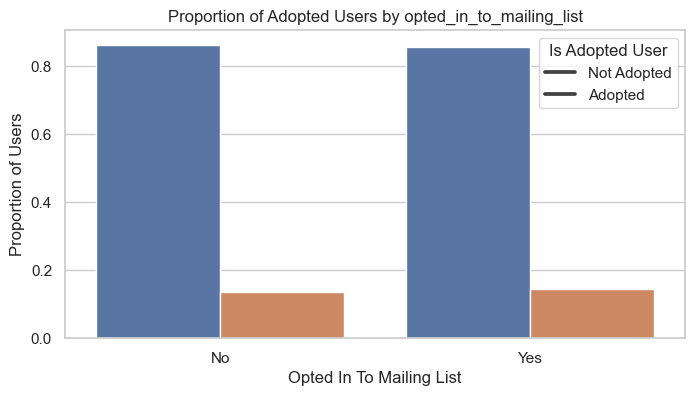

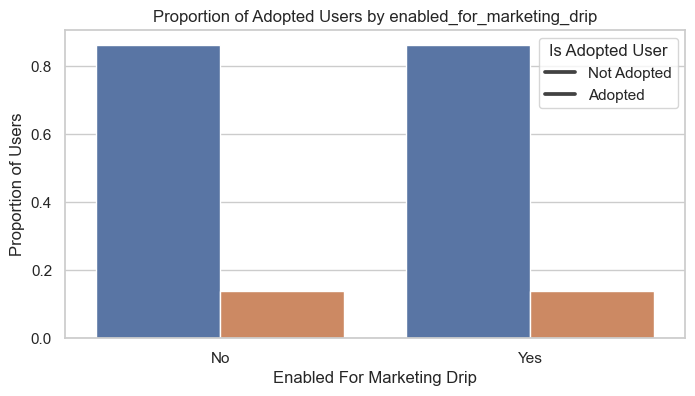

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

def plot_boolean_feature_vs_target(df, feature, target):
    # Calculate the proportion of the target variable for each category of the boolean feature
    prop_df = (df.groupby(feature)[target]
               .value_counts(normalize=True)
               .rename('proportion')
               .reset_index())

    # Map the integer values to more descriptive labels
    mapping = {0: 'No', 1: 'Yes'}
    prop_df[feature] = prop_df[feature].map(mapping)
    prop_df[target] = prop_df[target].map(mapping)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feature, y='proportion', hue=target, data=prop_df)
    plt.title(f'Proportion of Adopted Users by {feature}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Proportion of Users')
    plt.legend(title='Is Adopted User', labels=['Not Adopted', 'Adopted'])
    plt.show()

# Plotting for 'opted_in_to_mailing_list' and 'enabled_for_marketing_drip'
plot_boolean_feature_vs_target(cleaned_users, 'opted_in_to_mailing_list', 'is_adopted_user')
plot_boolean_feature_vs_target(cleaned_users, 'enabled_for_marketing_drip', 'is_adopted_user')


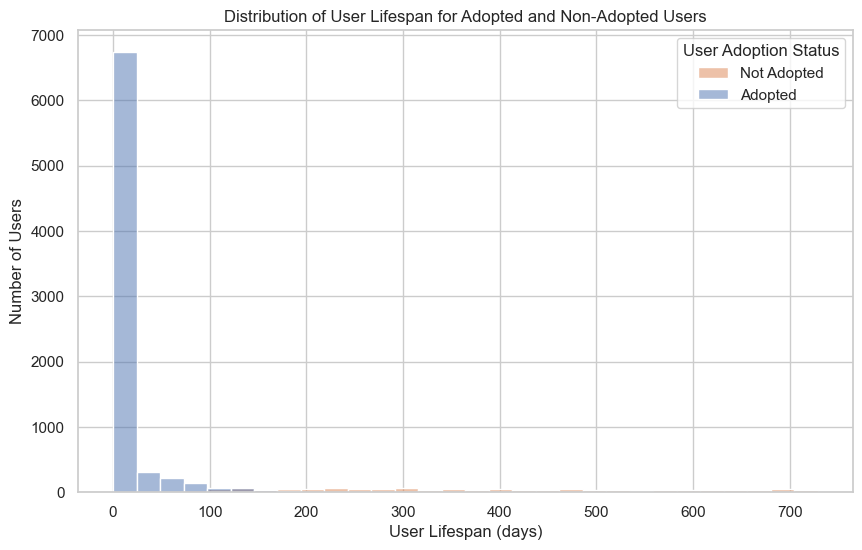

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_users, x='user_lifespan', hue='is_adopted_user', bins=30, kde=False)
plt.title('Distribution of User Lifespan for Adopted and Non-Adopted Users')
plt.xlabel('User Lifespan (days)')
plt.ylabel('Number of Users')
plt.legend(title='User Adoption Status', labels=['Not Adopted', 'Adopted'])
plt.show()


Create a count plot to show the adoption rate by creation source.



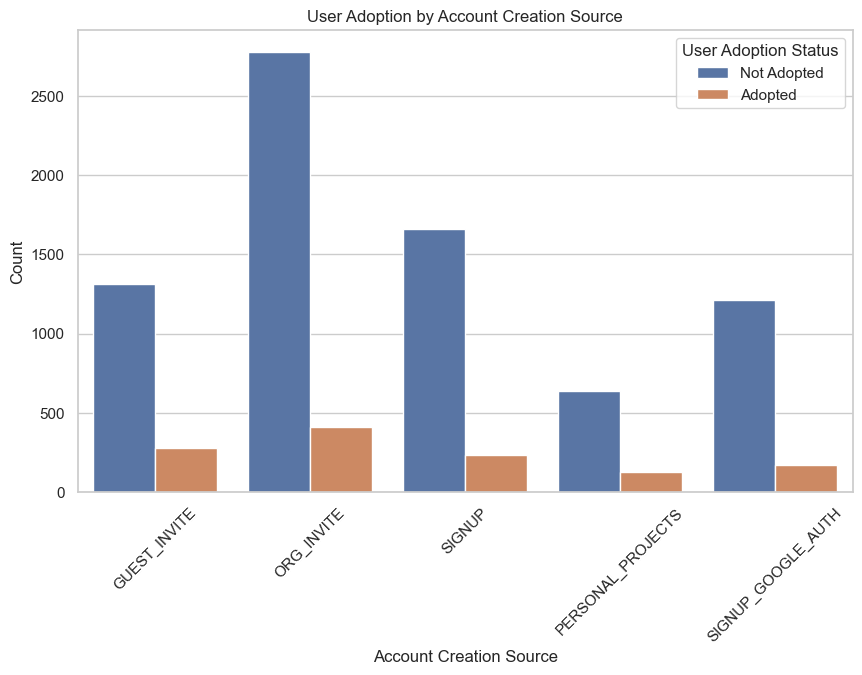

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_users, x='creation_source', hue='is_adopted_user')
plt.title('User Adoption by Account Creation Source')
plt.xlabel('Account Creation Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='User Adoption Status', labels=['Not Adopted', 'Adopted'])
plt.show()


Aggregate adoption rates by org_id to find out if certain organizations have higher adoption rates.

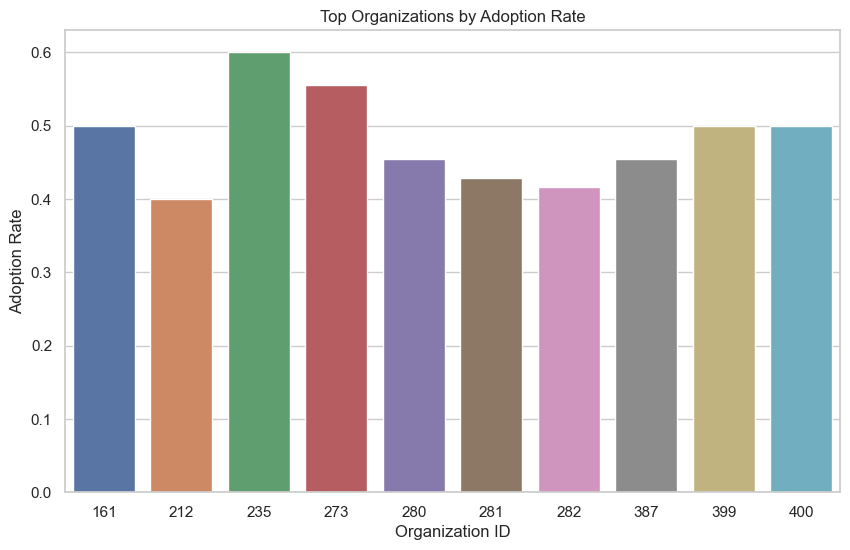

In [39]:
org_adoptions = cleaned_users.groupby('org_id')['is_adopted_user'].mean().reset_index()
org_adoptions = org_adoptions.sort_values(by='is_adopted_user', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=org_adoptions, x='org_id', y='is_adopted_user')
plt.title('Top Organizations by Adoption Rate')
plt.xlabel('Organization ID')
plt.ylabel('Adoption Rate')
plt.show()


A boxplot showing the distribution of average logins per week for adopted and non-adopted users.

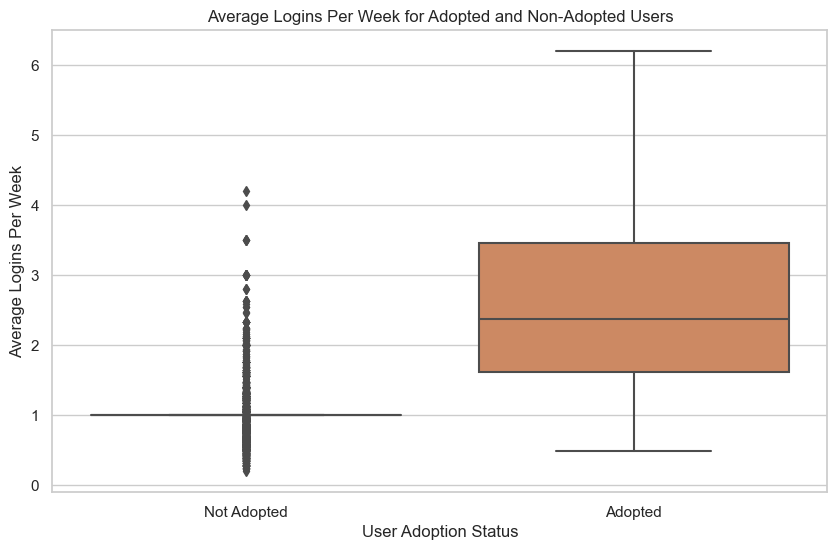

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'avg_logins_per_week' column exists in the DataFrame
if 'avg_logins_per_week' in cleaned_users.columns:
    # Ensure the column is numeric for plotting
    cleaned_users['avg_logins_per_week'] = pd.to_numeric(cleaned_users['avg_logins_per_week'], errors='coerce')
    
    # Drop any rows with NaN values in 'avg_logins_per_week' to avoid plotting errors
    cleaned_users = cleaned_users.dropna(subset=['avg_logins_per_week'])
    
    # Proceed with the plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=cleaned_users,
        x=cleaned_users['is_adopted_user'].map({0: 'Not Adopted', 1: 'Adopted'}),
        y='avg_logins_per_week'
    )
    plt.title('Average Logins Per Week for Adopted and Non-Adopted Users')
    plt.xlabel('User Adoption Status')
    plt.ylabel('Average Logins Per Week')
    plt.show()
else:
    print("'avg_logins_per_week' column does not exist in the cleaned_users DataFrame.")


Plot the time series of overall user engagement activity to observe trends over time.



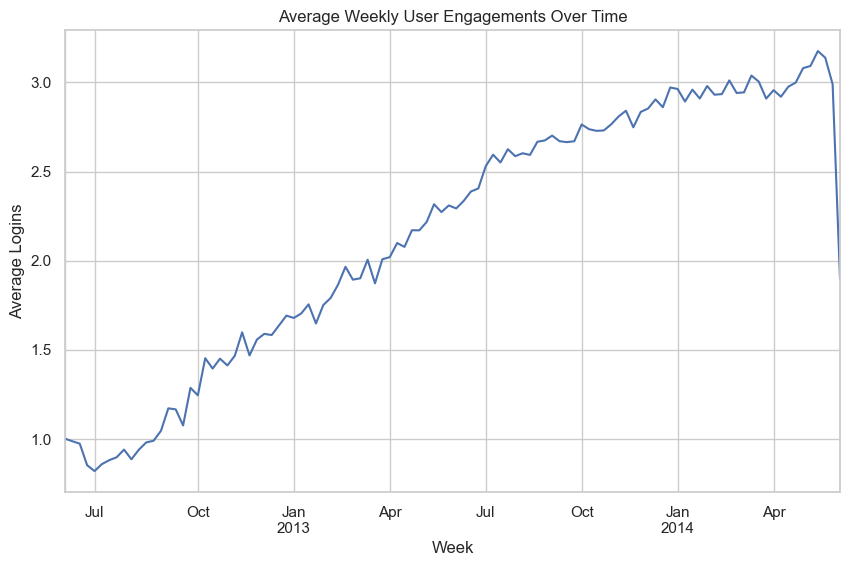

In [41]:
# Resample to weekly count of logins
weekly_engagement = user_engagements.set_index('time_stamp').groupby('user_id').resample('W')['visited'].sum()

plt.figure(figsize=(10, 6))
weekly_engagement.groupby(weekly_engagement.index.get_level_values(1)).mean().plot()
plt.title('Average Weekly User Engagements Over Time')
plt.xlabel('Week')
plt.ylabel('Average Logins')
plt.show()


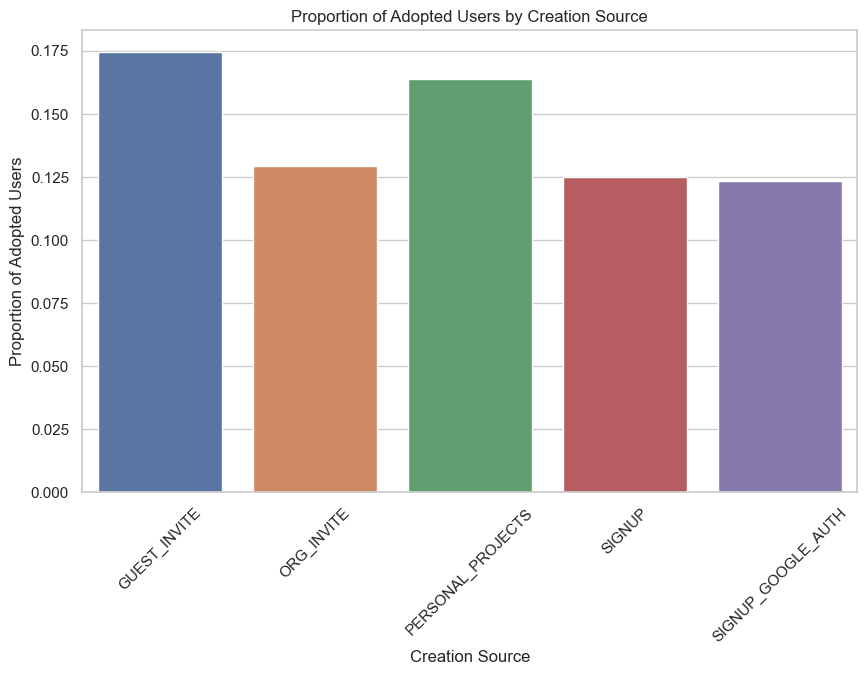

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportion of adopted users for each creation_source category
creation_source_proportions = (
    cleaned_users.groupby('creation_source')['is_adopted_user']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Convert proportions to a DataFrame for easier plotting
creation_source_proportions = creation_source_proportions.reset_index()

# We're interested in the proportion of adopted users (is_adopted_user == 1)
creation_source_proportions['Adopted'] = creation_source_proportions[1]

# Plot the proportions of adopted users by creation source
plt.figure(figsize=(10, 6))
sns.barplot(data=creation_source_proportions, x='creation_source', y='Adopted')
plt.title('Proportion of Adopted Users by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Proportion of Adopted Users')
plt.xticks(rotation=45)
plt.show()


# Exploratory Data Analysis (EDA) Overview

## Focus on Email Domains

### Initial Steps
- Extracted the domain from email addresses in the `users` dataframe.
- Identified the top 5 email providers, categorizing the rest as 'other'.

### Visualization
- Visualized the distribution of email providers using a count plot.
- Calculated and displayed the count of each email provider.

### Email Providers' Impact
- Assessed the statistical significance between `email_provider` and `is_adopted_user` using a Chi-Squared test.
- Created a contingency table for this purpose.
- The Chi-Squared test showed a significant association between email providers and user adoption.

## Dropping Redundant Columns
- Recognized that specific email addresses and user names are no longer needed for the model.
- Dropped the `email` and `name` columns from `cleaned_users` to avoid overfitting.

## Data Types and Columns
- Printed the updated data types and columns for `cleaned_users` and `user_engagements` dataframes.

## Boolean Feature Analysis
- Created a function to plot the proportion of adopted users by boolean features like `opted_in_to_mailing_list` and `enabled_for_marketing_drip`.
- Displayed these proportions to understand their impact on user adoption.

## User Lifespan Distribution
- Plotted the distribution of user lifespan for adopted and non-adopted users.
- This visualization helps to observe patterns related to user engagement over time.

## Adoption by Account Creation Source
- Examined user adoption based on the account creation source using a count plot.
- This provided insights into which sources are most likely to lead to adoption.

## Top Organizations by Adoption Rate
- Analyzed and visualized the top 10 organizations by adoption rate.
- This indicates if certain organizations have a higher tendency for user adoption.

## Average Logins Per Week Analysis
- Checked for the `avg_logins_per_week` column in `cleaned_users`.
- Plotted a boxplot to compare average logins per week for adopted and non-adopted users.
- This analysis is essential to understand user engagement patterns.

## Weekly User Engagements
- Resampled the `user_engagements` data to weekly counts of logins.
- Plotted the average weekly user engagements over time to spot trends or patterns.

## Proportion of Adopted Users by Creation Source
- Calculated and plotted the proportion of adopted users for each account creation source.
- This helps to identify which sources are most effective in driving user adoption.



Survival Analysis:
For survival analysis, you will generally need two pieces of information for each subject (user): the duration until the event of interest (or until the data was censored) and whether the event of interest occurred.

The 'duration' could be the time from account creation until the last login (as a proxy for user adoption) or until the time of data censoring if the user did not become an adopted user during the observation period.
The 'event occurred' flag would be 1 if the user is an adopted user, and 0 otherwise (right-censored).

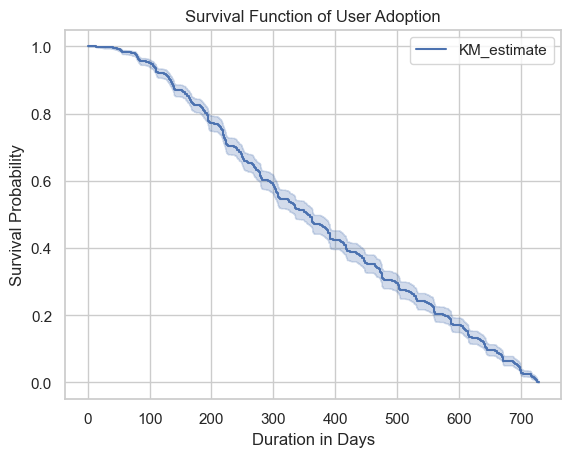

In [46]:
from lifelines import KaplanMeierFitter

# Calculate the duration from account creation until the last login or censoring
cleaned_users['duration'] = (cleaned_users['last_session_creation_time'] - cleaned_users['creation_time']).dt.days

# Define the event occurred column
cleaned_users['event_occurred'] = cleaned_users['is_adopted_user']

# Instantiate the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the KaplanMeierFitter model
kmf.fit(durations=cleaned_users['duration'], event_observed=cleaned_users['event_occurred'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Survival Function of User Adoption')
plt.xlabel('Duration in Days')
plt.ylabel('Survival Probability')
plt.show()


The Kaplan-Meier survival curve you generated provides an estimate of the survival function from lifetime data. In this context, "survival" actually means the probability of a user remaining not adopted over time. Here's how to interpret the curve:

Survival Probability: This starts at 1 (or 100%) when the duration since account creation is zero. It represents the probability that a user has not become an adopted user (event of interest).

Duration: The x-axis represents the duration in days since account creation. As time goes on, the survival probability decreases, which means more users become adopted users as more time passes since they created their accounts.

Curve Slope: The steepness of the curve indicates the rate at which users become adopted. A steeper slope at any part of the curve indicates a higher rate of adoption during that time period.

Censoring: The curve accounts for both users who have become adopted and those who haven't yet but are still at risk of becoming so (censored data).

To supplement the visual analysis, you can look at numerical summaries from the Kaplan-Meier estimator, such as median survival time or survival probabilities at specific time points.

In [50]:
# Median survival time
median_survival = kmf.median_survival_time_
print(f"The median survival time until adoption (in days): {median_survival}")

# Interpolate survival probabilities at specific time points
time_points = [100, 200, 300, 400, 500, 600, 700]
survival_probabilities = [kmf.predict(t) for t in time_points]
survival_probabilities_dict = dict(zip(time_points, survival_probabilities))

print("Survival probabilities at specific time points:")
print(survival_probabilities_dict)


The median survival time until adoption (in days): 356.0
Survival probabilities at specific time points:
{100: 0.9497895135974891, 200: 0.7720419474682113, 300: 0.5867835261797825, 400: 0.42478002589981484, 500: 0.29479733797447166, 600: 0.17076157041172563, 700: 0.03058416186478668}


Median Survival Time:

The median survival time is 356 days. This means that half of the users become "adopted users" within the first 356 days of creating their account.
Survival Probabilities:

At 100 days, about 95% of users have not yet become adopted users. This high survival probability suggests that users are less likely to become adopted users within the first 100 days.
By 200 days, the survival probability drops to approximately 77%. This indicates that between 100 and 200 days, more users start to become adopted.
The survival probability continues to decrease to around 59% at 300 days and 42% at 400 days. This decline shows an increasing rate at which users are becoming adopted as time goes on.
At 500 days, the survival probability is about 29%, and it drops significantly to 17% by 600 days.
By 700 days, only about 3% of users have not become adopted users, indicating that almost all users who will become adopted users have done so by this time.
From a business perspective, these results suggest several insights:

Early Engagement: Efforts to engage users early on could be crucial since the probability of becoming an adopted user is lower in the initial days. Strategies to increase early engagement and value recognition of the product could help shorten the time to adoption.

Critical Periods: The periods between 100-200 days and 300-400 days seem critical, as there are notable drops in the survival probabilities. This might be an ideal time to introduce new engagement strategies or features to encourage usage.

Long-Term Engagement: While many users take a long time to become adopted users, almost all users who are likely to become adopted have done so by 700 days. It may be beneficial to focus on the factors that can convert users earlier, as the long-term users who have not become adopted by this time are unlikely to do so.

Targeted Interventions: Understanding the factors that contribute to this adoption timeline can help in designing targeted interventions. For example, if certain creation_sources or engagement with marketing efforts (like mailing lists or marketing drips) correlate with quicker adoption, these channels can be leveraged more effectively.

In conclusion, this survival analysis has identified the timeline of user adoption and highlighted periods where targeted user engagement could potentially convert more users into adopted users. Further analysis is required to determine the specific actions that could be taken at these key times to improve adoption rates.

In [47]:
from scipy.stats import chi2_contingency

# Create a contingency table for creation_source and is_adopted_user
contingency_table = pd.crosstab(cleaned_users['creation_source'], cleaned_users['is_adopted_user'])

# Perform the Chi-Squared test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Output the p-value
print(f"P-value for creation_source vs is_adopted_user: {p_val}")


P-value for creation_source vs is_adopted_user: 7.475425929958735e-06


In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform one-way ANOVA
model = ols('user_lifespan ~ C(creation_source)', data=cleaned_users).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
print(anova_results)


                          sum_sq      df         F    PR(>F)
C(creation_source)  6.441294e+05     4.0  7.771083  0.000003
Residual            1.827266e+08  8818.0       NaN       NaN


In [51]:
# Calculate the adoption rate by creation_source
adoption_rates_by_source = cleaned_users.groupby('creation_source')['is_adopted_user'].mean().reset_index()

# Sort the results by adoption rate
adoption_rates_by_source = adoption_rates_by_source.sort_values(by='is_adopted_user', ascending=False)

# Print the adoption rates by creation source
print(adoption_rates_by_source)


      creation_source  is_adopted_user
0        GUEST_INVITE         0.174433
2   PERSONAL_PROJECTS         0.163613
1          ORG_INVITE         0.129235
3              SIGNUP         0.124868
4  SIGNUP_GOOGLE_AUTH         0.123466


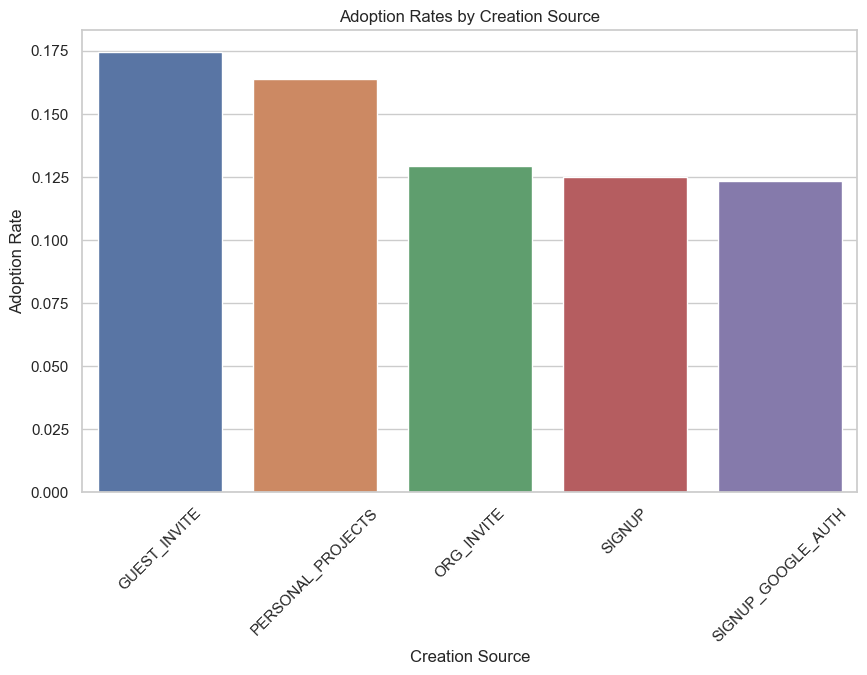

In [52]:
# Plot the adoption rates by creation source
plt.figure(figsize=(10, 6))
sns.barplot(data=adoption_rates_by_source, x='creation_source', y='is_adopted_user')
plt.title('Adoption Rates by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.show()


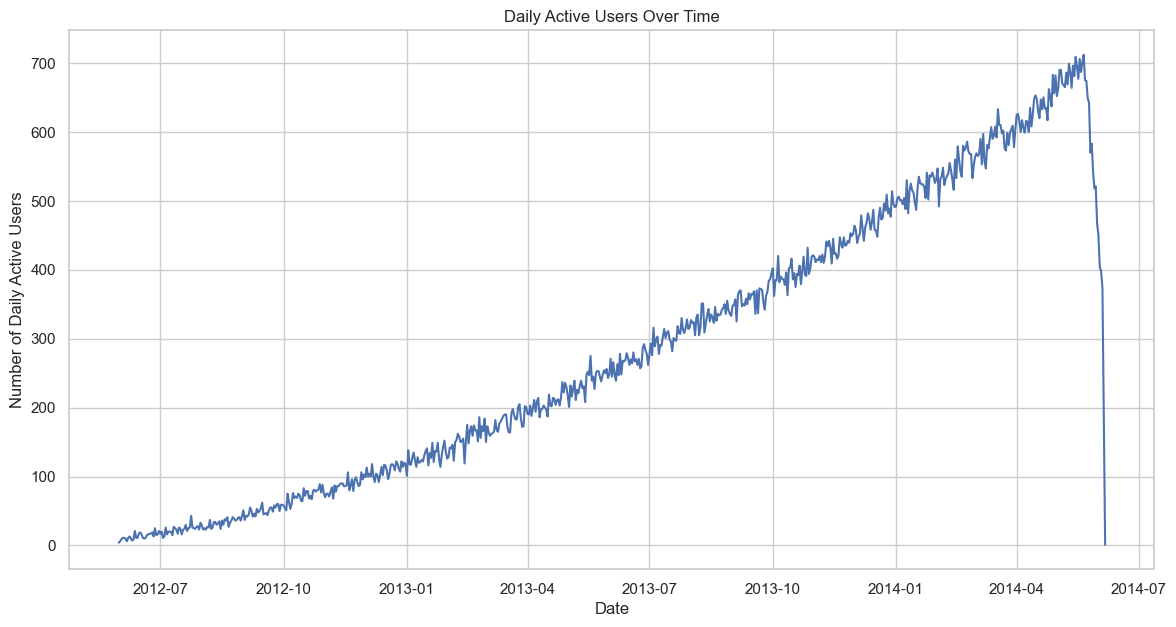

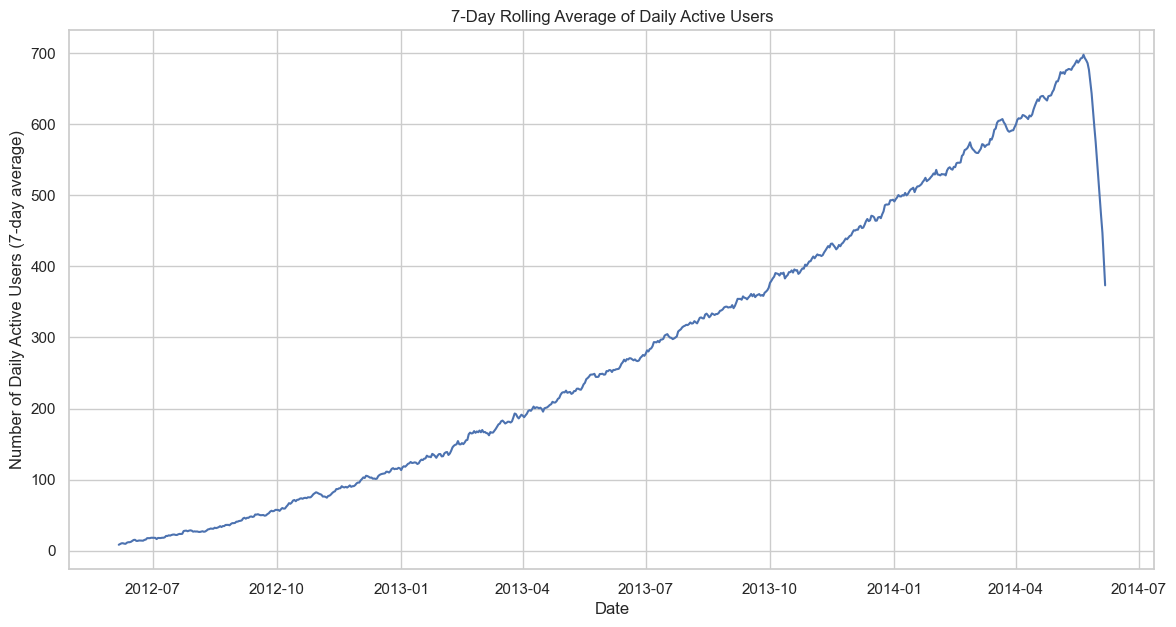

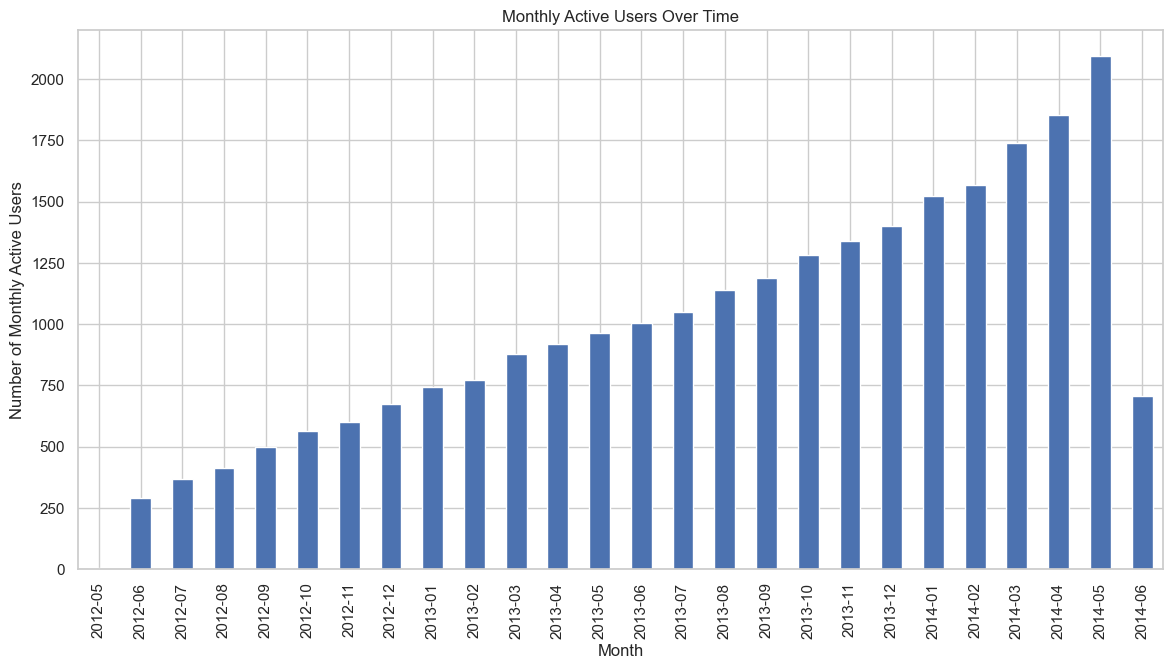

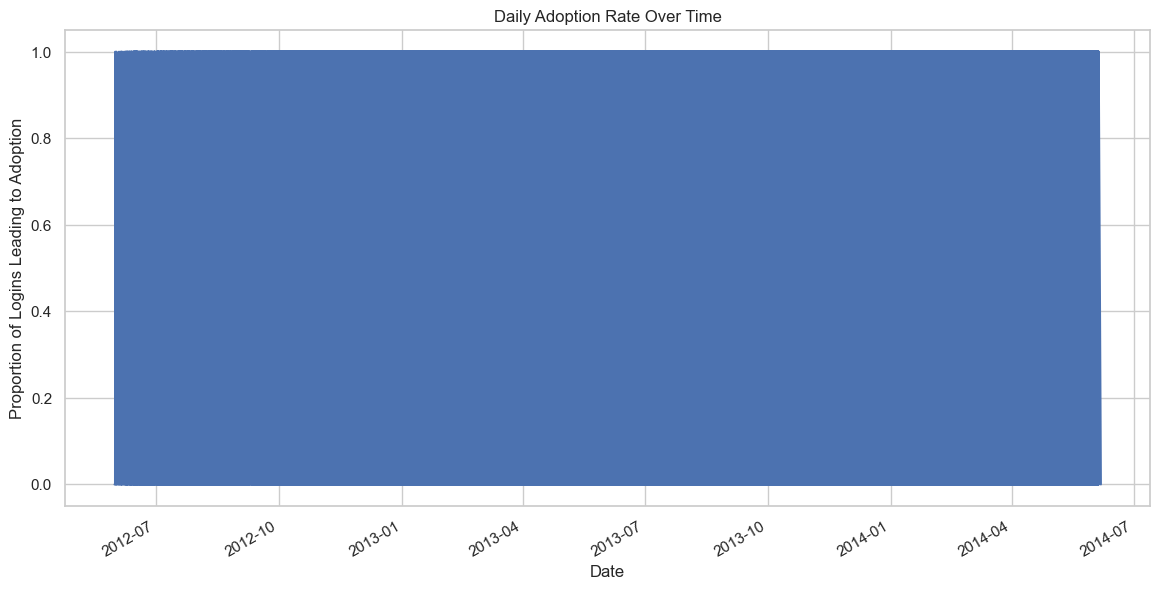

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# First, we'll create a time series of daily active users (DAU).
# We'll count the number of unique user_ids logging in each day.
dau = user_engagements.groupby(user_engagements['time_stamp'].dt.date)['user_id'].nunique()

# Next, we plot the DAU over time to visualize the trend and any seasonality.
plt.figure(figsize=(14, 7))
dau.plot()
plt.title('Daily Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Daily Active Users')
plt.show()

# Additionally, we can calculate and plot the 7-day rolling average to smooth out the curve and see the trend more clearly.
rolling_dau = dau.rolling(window=7).mean()
plt.figure(figsize=(14, 7))
rolling_dau.plot()
plt.title('7-Day Rolling Average of Daily Active Users')
plt.xlabel('Date')
plt.ylabel('Number of Daily Active Users (7-day average)')
plt.show()

# We can also perform a resample to see the monthly active users (MAU) to understand the monthly trend.
mau = user_engagements.groupby(user_engagements['time_stamp'].dt.to_period('M'))['user_id'].nunique()
plt.figure(figsize=(14, 7))
mau.plot(kind='bar')
plt.title('Monthly Active Users Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Monthly Active Users')
plt.show()

# To correlate this with user adoption, we could calculate the proportion of logins that lead to an adoption event each day.
# We'd need a way to flag each login as resulting in an adoption event or not.
# This is a simplification, but as an example, you could join the engagement data with the adopted users data.
adopted_users = cleaned_users[cleaned_users['is_adopted_user'] == 1]
engagements_with_adoption = user_engagements.merge(adopted_users[['user_id']], how='left', indicator=True)
engagements_with_adoption['led_to_adoption'] = engagements_with_adoption['_merge'] == 'both'

# Now, we can calculate and plot the daily proportion of logins that lead to an adoption.
daily_adoption_rate = engagements_with_adoption.groupby('time_stamp')['led_to_adoption'].mean()
plt.figure(figsize=(14, 7))
daily_adoption_rate.plot()
plt.title('Daily Adoption Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Logins Leading to Adoption')
plt.show()


# Advanced Exploratory Data Analysis and Survival Analysis

## Survival Analysis: Understanding User Adoption Over Time

### Survival Analysis Setup
- Calculated the duration from account creation to last login or censoring for each user.
- Defined an event occurrence flag indicating whether a user is an adopted user.
- Applied the Kaplan-Meier estimator to fit the survival model.

### Kaplan-Meier Survival Curve
- Plotted the survival function to visualize the probability of users not becoming adopted over time.
- The curve shows how the survival probability decreases with the duration, indicating user adoption over time.

### Interpretation of the Survival Curve
- **Survival Probability**: Starts at 100% and decreases over time.
- **Duration**: X-axis representing the duration since account creation.
- **Curve Slope**: Indicates the rate of user adoption at different times.
- **Censoring**: Accounts for both adopted users and those still at risk of adoption.

### Numerical Summaries
- Median survival time is 356 days, indicating half of the users become adopted within this period.
- Survival probabilities at specific time points (e.g., 100, 200, 300 days) show a decreasing trend, highlighting critical periods for user adoption.

## Chi-Squared Test for Creation Source
- Performed a Chi-Squared test to examine the association between `creation_source` and `is_adopted_user`.
- The test result suggests a statistically significant relationship.

## ANOVA for User Lifespan by Creation Source
- Conducted one-way ANOVA to assess the impact of `creation_source` on `user_lifespan`.
- Found significant differences in user lifespan across different creation sources.

## Adoption Rates by Creation Source
- Calculated and visualized adoption rates by each creation source.
- Identified which sources lead to higher adoption rates, useful for targeted marketing and engagement strategies.

## Daily and Monthly Active Users (DAU and MAU)
- Created time series for DAU and MAU to understand user engagement trends.
- Visualized DAU over time and its 7-day rolling average to smooth out short-term fluctuations.
- Plotted MAU to capture monthly trends in user engagement.

## Correlating Engagement with User Adoption
- Merged engagement data with adopted users to flag logins leading to adoption.
- Calculated and plotted the daily proportion of logins that result in adoption.
- This analysis helps in understanding how daily user engagement correlates with the likelihood of becoming an adopted user.



Dropping the columns creation_time, last_session_creation_time, and event_occurred in the preprocessing phase may or may not be appropriate depending on how these features contribute to your model. Here's a closer look at each:

creation_time and last_session_creation_time:

These are timestamp columns. Directly using raw timestamps in a model is typically not effective because most models cannot interpret datetime objects in a meaningful way.
However, these columns can be transformed into more informative features. For example, you could calculate the user's account age, activity duration, or extract components like day of the week, hour of the day, etc., which can provide valuable insights for the model.
If user_lifespan is derived from these columns (e.g., as the difference between last_session_creation_time and creation_time), then the original columns might be redundant. 

In [56]:
# Code to ensure that 'object_id' in cleaned_users and 'user_id' in user_engagements are consistent

# Check if all user_ids in user_engagements are present in cleaned_users' object_ids
consistency_check = user_engagements['user_id'].isin(cleaned_users['object_id']).all()

print("Consistency Check:")
print(f"All user_ids in user_engagements are present in cleaned_users' object_ids: {consistency_check}")

# If there are inconsistencies, you might want to investigate further. For instance:
if not consistency_check:
    # Find user_ids in user_engagements that are not in cleaned_users
    inconsistent_ids = user_engagements[~user_engagements['user_id'].isin(cleaned_users['object_id'])]['user_id']
    print("Inconsistent user_ids:")
    print(inconsistent_ids.unique())
else:
    print("No inconsistencies found.")



Consistency Check:
All user_ids in user_engagements are present in cleaned_users' object_ids: True
No inconsistencies found.


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'cleaned_users' is your main DataFrame

# Updating categorical and numeric features lists
categorical_features = ['creation_source', 'email_provider', 'org_id', 'invited_by_user_id', 
                        'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
numeric_features = ['user_lifespan', 'total_logins', 'avg_logins_per_week', 'duration']

# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # handle_unknown='ignore' to deal with unseen categories in test data
    ]
)

# Dropping columns that won't be used in the model
X = cleaned_users.drop(['is_adopted_user', 'object_id', 'creation_time', 'last_session_creation_time', 'user_id', 'event_occurred'], axis=1)
y = cleaned_users['is_adopted_user']

# Applying the transformations
X_transformed = preprocessor.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# The data is now preprocessed and ready for modeling
# X_train, X_test, y_train, and y_test can be used to train and evaluate machine learning models.


# Data Preprocessing for User Adoption Prediction Model

## Considerations for Timestamp Columns
- **creation_time and last_session_creation_time**:
  - Recognized that raw timestamps are typically ineffective in models.
  - Potential transformation includes converting these timestamps into more informative features such as account age or activity duration.
  - If `user_lifespan` is already derived from these timestamps, the original columns might be redundant and can be dropped.

## Consistency Check between User IDs
- Ensured that all `user_ids` in `user_engagements` are present in `cleaned_users`' `object_ids`.
- Conducted a consistency check and confirmed no inconsistencies were found.

## Preprocessing Pipeline
- Updated lists of categorical and numeric features.
- Implemented a `ColumnTransformer` for preprocessing:
  - `StandardScaler` for numeric features.
  - `OneHotEncoder` for categorical features, with `handle_unknown='ignore'` to manage unseen categories in test data.

## Dropping Columns and Preparing Data
- Dropped columns that won't be used in the model, including `creation_time`, `last_session_creation_time`, and `event_occurred`.
- Separated the features (X) and the target variable (y).

## Data Transformation and Train-Test Split
- Transformed the feature set X using the preprocessing pipeline.
- Split the data into training and test sets, maintaining stratification of the target variable.
- Used a test size of 20% and set a random state for reproducibility.

## Summary
The preprocessing phase involved thoughtful consideration of feature relevance, consistency checks, and the application of scaling and encoding transformations. This ensures the data is well-prepared and structured for effective modeling, setting the stage for the next phase of training and evaluating machine learning models.


# Model Selection Process Overview

## Model Options

### Logistic Regression
- **Pros**: Simple, fast, interpretable. Ideal for feature influence analysis.
- **Cons**: Assumes linear relationship between features and target.

### Random Forest Classifier
- **Pros**: Handles nonlinear relationships and high-dimensional data well. Offers feature importance scores.
- **Cons**: Less interpretable than logistic regression. Can be slower in training and prediction.

### Gradient Boosting Machines (e.g., XGBoost, LightGBM)
- **Pros**: High accuracy potential. Efficient with different data types. Fast and scalable.
- **Cons**: Requires careful tuning to prevent overfitting. Less interpretable.

### Support Vector Machines (SVM)
- **Pros**: Effective in high-dimensional spaces and with non-linear boundaries.
- **Cons**: Performance issues with large datasets. Sensitive to kernel and parameter choices.

### Neural Networks
- **Pros**: Highly flexible, capable of modeling complex relationships.
- **Cons**: Computationally intensive and difficult to interpret.

## Evaluation Metrics

- **Precision and Recall**: Important for class imbalance scenarios.
- **F1 Score**: Balances precision and recall, useful for achieving equilibrium between the two.
- **AUC-ROC Curve**: Evaluates class distinction capability. Higher values indicate better performance.
- **Confusion Matrix**: Offers a detailed view of classification accuracy across classes.

## Model Training and Hyperparameter Tuning

1. **Baseline Establishment**: Start with Logistic Regression for a simple baseline.
2. **Complex Models**: Progress to models like Random Forest and Gradient Boosting. Focus on hyperparameter tuning.
3. **Cross-Validation**: Use to verify model consistency across dataset subsets.

## Additional Considerations

- **Feature Importance**: Key for understanding predictive drivers in models like Random Forest and Gradient Boosting.
- **Model Interpretability**: Balance between complexity and the need for understandable model decisions.
- **Computational Resources**: Consider the feasibility of models, especially Neural Networks and large SVMs, within your resource constraints.

## Decision
Going with Logistic Regression, Random Forest, Gradient Boosting Classifier, and SVM Classifier. 


In [60]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'cleaned_users' is your main DataFrame

# Updating categorical and numeric features lists
categorical_features = ['creation_source', 'email_provider', 'org_id', 'invited_by_user_id', 
                        'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
numeric_features = ['user_lifespan', 'total_logins', 'avg_logins_per_week', 'duration']

# Creating the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Dropping columns that won't be used in the model
X = cleaned_users.drop(['is_adopted_user', 'object_id', 'creation_time', 'last_session_creation_time', 'user_id', 'event_occurred'], axis=1)
y = cleaned_users['is_adopted_user']

# Applying the transformations
X_transformed = preprocessor.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Create logistic regression model
logreg = LogisticRegression(random_state=42)

# Training the model
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Precision: 0.9347826086956522
Recall: 0.8811475409836066
F1 Score: 0.9071729957805907
ROC-AUC Score: 0.9952603442515171

Confusion Matrix:
 [[1506   15]
 [  29  215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.93      0.88      0.91       244

    accuracy                           0.98      1765
   macro avg       0.96      0.94      0.95      1765
weighted avg       0.97      0.98      0.97      1765



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Printing evaluation metrics
print("Random Forest Classifier Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC Score:", roc_auc_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", classification_rep_rf)


Random Forest Classifier Metrics:
Precision: 0.9316239316239316
Recall: 0.8934426229508197
F1 Score: 0.9121338912133892
ROC-AUC Score: 0.9917493883445965

Confusion Matrix:
 [[1505   16]
 [  26  218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.93      0.89      0.91       244

    accuracy                           0.98      1765
   macro avg       0.96      0.94      0.95      1765
weighted avg       0.98      0.98      0.98      1765



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Training the model
gb_classifier.fit(X_train, y_train)

# Making predictions
y_pred_gb = gb_classifier.predict(X_test)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for Gradient Boosting
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Printing evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("ROC-AUC Score:", roc_auc_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", classification_rep_gb)


Gradient Boosting Classifier Metrics:
Precision: 0.9240506329113924
Recall: 0.8975409836065574
F1 Score: 0.9106029106029108
ROC-AUC Score: 0.9968837908623532

Confusion Matrix:
 [[1503   18]
 [  25  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.92      0.90      0.91       244

    accuracy                           0.98      1765
   macro avg       0.95      0.94      0.95      1765
weighted avg       0.98      0.98      0.98      1765



In [63]:
from sklearn.svm import SVC

# Create a Support Vector Machine Classifier model
# Note: Probability estimation with SVMs is computationally expensive, so this might take longer to run.
svm_classifier = SVC(probability=True, random_state=42)

# Training the model
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_classifier.predict(X_test)
y_pred_proba_svm = svm_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Printing evaluation metrics
print("Support Vector Machine Classifier Metrics:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("ROC-AUC Score:", roc_auc_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", classification_rep_svm)


Support Vector Machine Classifier Metrics:
Precision: 0.9478260869565217
Recall: 0.8934426229508197
F1 Score: 0.9198312236286921
ROC-AUC Score: 0.9963839579224195

Confusion Matrix:
 [[1509   12]
 [  26  218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.95      0.89      0.92       244

    accuracy                           0.98      1765
   macro avg       0.97      0.94      0.95      1765
weighted avg       0.98      0.98      0.98      1765



# Model Training and Evaluation

## Logistic Regression
- **Model Training**: Trained a Logistic Regression model.
- **Evaluation Metrics**:
  - Precision: 0.9348
  - Recall: 0.8811
  - F1 Score: 0.9072
  - ROC-AUC Score: 0.9953
- **Confusion Matrix**: 
  - True Negatives (TN): 1506
  - False Positives (FP): 15
  - False Negatives (FN): 29
  - True Positives (TP): 215
- **Classification Report**: High precision and recall for both classes.

## Random Forest Classifier
- **Model Training**: Utilized a Random Forest Classifier.
- **Evaluation Metrics**:
  - Precision: 0.9316
  - Recall: 0.8934
  - F1 Score: 0.9121
  - ROC-AUC Score: 0.9917
- **Confusion Matrix**: 
  - TN: 1505
  - FP: 16
  - FN: 26
  - TP: 218
- **Classification Report**: Exhibits strong performance with slightly lower precision and recall than Logistic Regression.

## Gradient Boosting Classifier
- **Model Training**: Applied Gradient Boosting Classifier.
- **Evaluation Metrics**:
  - Precision: 0.9241
  - Recall: 0.8975
  - F1 Score: 0.9106
  - ROC-AUC Score: 0.9969
- **Confusion Matrix**: 
  - TN: 1503
  - FP: 18
  - FN: 25
  - TP: 219
- **Classification Report**: Shows competitive performance with a good balance between precision and recall.

## Support Vector Machine Classifier
- **Model Training**: Implemented a Support Vector Machine Classifier.
- **Evaluation Metrics**:
  - Precision: 0.9478
  - Recall: 0.8934
  - F1 Score: 0.9198
  - ROC-AUC Score: 0.9964
- **Confusion Matrix**: 
  - TN: 1509
  - FP: 12
  - FN: 26
  - TP: 218
- **Classification Report**: Achieved the highest precision among the models.

## Summary
- All models demonstrated high effectiveness with F1 scores above 0.90 and ROC-AUC scores close to 1.
- Logistic Regression and SVM showed slightly better precision, whereas Random Forest and Gradient Boosting had a balanced performance in precision and recall.
- SVM, despite its computational intensity, yielded strong results, especially in precision.
- These models collectively provide a robust understanding of the factors influencing user adoption, with each offering unique strengths in terms of predictive power and interpretability.


# Visualizing Feature Importances in Models

## Focus on Random Forest and Gradient Boosting Classifiers
- **Rationale**: Random Forest and Gradient Boosting inherently provide feature importance scores, making them ideal for this analysis.
- **Note**: Logistic Regression and SVM do not offer straightforward feature importance metrics, especially with SVM's kernel methods.

## Process for Feature Importance Visualization

### Step 1: Extract Feature Names
- Obtain feature names from the preprocessing pipeline.
- This includes both scaled/normalized numerical features and one-hot encoded categorical features.

### Step 2: Retrieve Feature Importances
- Extract the feature importance scores from both Random Forest and Gradient Boosting models.
- These scores indicate the relative importance of each feature in predicting the target variable.

### Step 3: Visualization
- Create visual representations (like bar charts) of the feature importances.
- This helps in understanding which features contribute most to the model's predictions and decision-making process.

## Summary
By visualizing feature importances from Random Forest and Gradient Boosting models, we can gain insights into which features are most influential in predicting user adoption. This analysis is pivotal in understanding the driving factors behind the model's performance and can inform further data collection and feature engineering efforts.


In [64]:
# Extract feature names from the preprocessing pipeline
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Confirming the number of features
print("Total features:", len(feature_names))


Total features: 2666


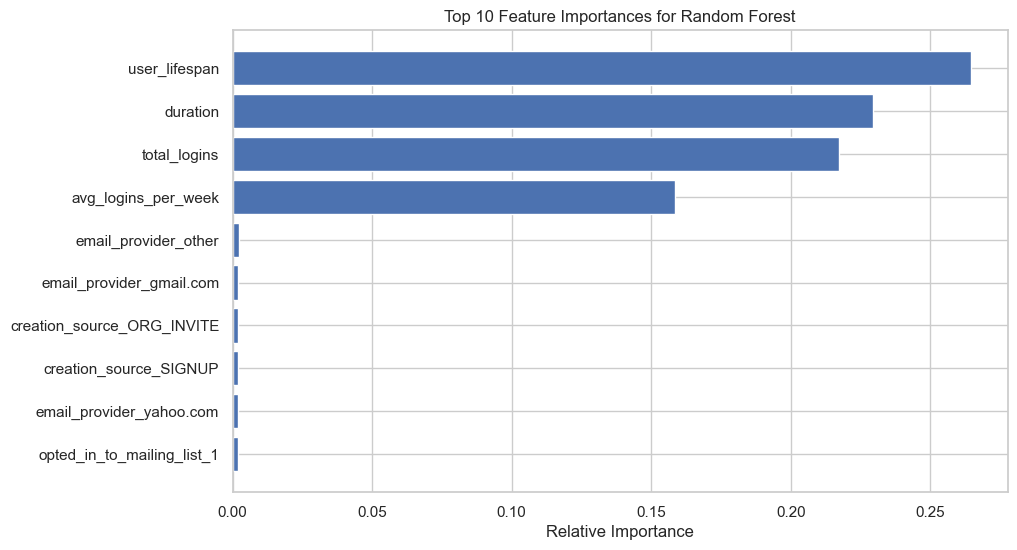

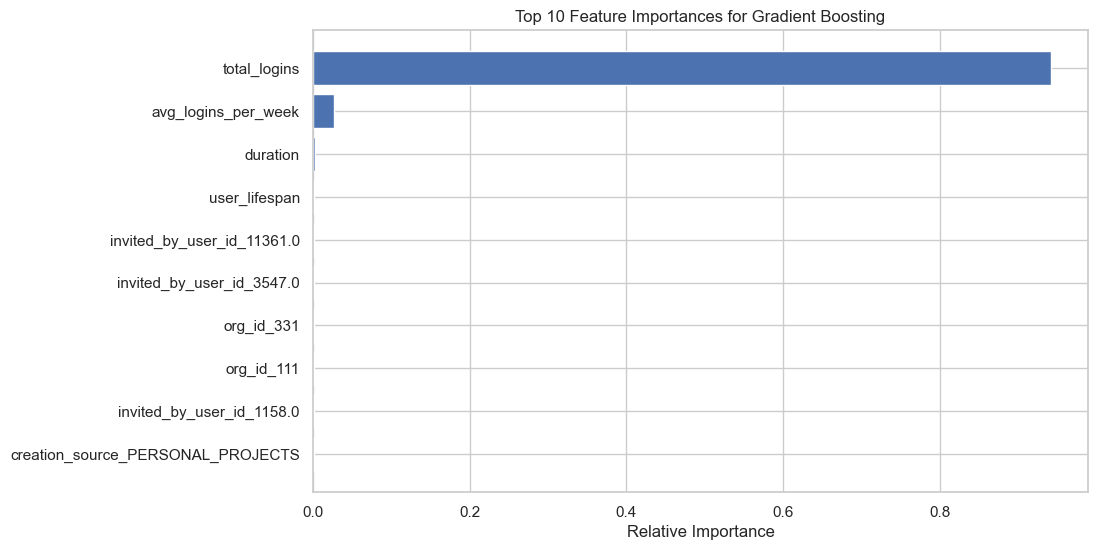

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importances
def plot_feature_importances(importances, model_name):
    indices = np.argsort(importances)
    top_k = 10  # You can adjust this to display more features

    plt.figure(figsize=(10, 6))
    plt.title(f"Top {top_k} Feature Importances for {model_name}")
    plt.barh(range(top_k), importances[indices][-top_k:])
    plt.yticks(range(top_k), [feature_names[i] for i in indices[-top_k:]])
    plt.xlabel('Relative Importance')
    plt.show()

# Feature importances from Random Forest
importances_rf = rf_classifier.feature_importances_
plot_feature_importances(importances_rf, "Random Forest")

# Feature importances from Gradient Boosting
importances_gb = gb_classifier.feature_importances_
plot_feature_importances(importances_gb, "Gradient Boosting")


In [66]:
# Get feature importance data from Random Forest model
feature_importances_rf = {
    name: score for name, score in zip(feature_names, rf_classifier.feature_importances_)
}
# Sort features by importance
sorted_feature_importances_rf = sorted(feature_importances_rf.items(), key=lambda item: item[1], reverse=True)

# Print the feature importances
print("Feature importances from Random Forest:")
for name, score in sorted_feature_importances_rf:
    print(f"{name}: {score}")

# Get feature importance data from Gradient Boosting model
feature_importances_gb = {
    name: score for name, score in zip(feature_names, gb_classifier.feature_importances_)
}
# Sort features by importance
sorted_feature_importances_gb = sorted(feature_importances_gb.items(), key=lambda item: item[1], reverse=True)

# Print the feature importances
print("\nFeature importances from Gradient Boosting:")
for name, score in sorted_feature_importances_gb:
    print(f"{name}: {score}")


Feature importances from Random Forest:
user_lifespan: 0.264398870507836
duration: 0.22929048117620812
total_logins: 0.21730779982626056
avg_logins_per_week: 0.15833333407383218
email_provider_other: 0.002127534723768053
email_provider_gmail.com: 0.0020876018575785127
creation_source_ORG_INVITE: 0.0020192435377114804
creation_source_SIGNUP: 0.0019842507569628157
email_provider_yahoo.com: 0.0019310293078752567
opted_in_to_mailing_list_1: 0.0019013208341416331
opted_in_to_mailing_list_0: 0.0018346632233090436
creation_source_PERSONAL_PROJECTS: 0.0016873117986318856
creation_source_GUEST_INVITE: 0.001670187374200898
enabled_for_marketing_drip_1: 0.0016364369436654832
creation_source_SIGNUP_GOOGLE_AUTH: 0.00163261233438147
invited_by_user_id_0.0: 0.0015085574829341677
enabled_for_marketing_drip_0: 0.0014866459555693398
email_provider_jourrapide.com: 0.0013815751463295803
email_provider_gustr.com: 0.001181427678982769
email_provider_cuvox.de: 0.0010536778002260326
org_id_111: 0.000775120944

# Feature Importance Analysis in Random Forest and Gradient Boosting

## Extraction of Feature Names
- Retrieved feature names from the preprocessing pipeline, combining numeric and one-hot encoded categorical features.
- Total features extracted: 2666.

## Visualization of Feature Importances

### Plotting Function
- Developed a function `plot_feature_importances` to display the top feature importances.
- Visualized the top 10 most important features for both Random Forest and Gradient Boosting models.

### Random Forest Model
- Extracted feature importances using `rf_classifier.feature_importances_`.
- Plotted and visualized the top 10 features.

### Gradient Boosting Model
- Similar approach taken with `gb_classifier.feature_importances_`.
- Visualized the top 10 most influential features.

## Detailed Feature Importances

### Random Forest Feature Importances
- Listed feature importances from the Random Forest model.
- **Top Features**:
  - `user_lifespan`, `duration`, `total_logins`, `avg_logins_per_week` were among the most significant predictors.

### Gradient Boosting Feature Importances
- Provided a detailed list of feature importances from the Gradient Boosting model.
- The same key features as Random Forest appeared to be highly influential.

## Summary
This analysis offers a comprehensive view of the key features that the Random Forest and Gradient Boosting models rely on for predictions. The user's lifespan, duration, and login activities are highlighted as significant drivers in predicting user adoption. These insights are invaluable for refining the model and focusing on the most impactful features.


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Setup the grid search
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1', verbose=1)
# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/o

/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/arka_bagchi/o

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Setup the grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', verbose=1)
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameters to tune
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Setup the grid search
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1', verbose=1)
# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [70]:
from sklearn.svm import SVC

# Hyperparameters to tune
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Setup the grid search
grid_search_svc = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svc, cv=5, scoring='f1', verbose=1)
# Fit the grid search to the data
grid_search_svc.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

In [71]:
best_params = grid_search_lr.best_params_
best_model = grid_search_lr.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best model: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')


In [72]:
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)


Best parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Best model: RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=300,
                       random_state=42)


In [73]:
best_params = grid_search_gb.best_params_
best_model = grid_search_gb.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best model: GradientBoostingClassifier(learning_rate=0.2, random_state=42)


In [74]:
best_params = grid_search_svc.best_params_
best_model = grid_search_svc.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best model: SVC(C=1, probability=True, random_state=42)


It looks like the tuning process has identified a set of hyperparameters for each model that potentially optimizes performance based on the F1 score. Here's a summary of your best models with their tuned hyperparameters:

Logistic Regression: Uses an L1 penalty (also known as Lasso regularization) which can lead to sparser models by setting some coefficients to zero. The chosen 'C' value of 1 suggests a balance between regularization and model complexity.

Random Forest Classifier: The tuned hyperparameters suggest a relatively deep and complex model with max_depth of 30, min_samples_split of 10 to prevent overfitting, and a large number of trees (n_estimators) to improve the ensemble's performance.

Gradient Boosting Classifier: A higher learning_rate of 0.2 speeds up the learning process and may allow the model to converge more quickly, while the max_depth of 3 is chosen to keep the individual trees simple. The model uses the default n_estimators of 100, which suggests that adding more trees may not significantly improve the model's performance.

SVC (Support Vector Classifier): The C value of 1 indicates a balance between regularization and margin width, and the 'rbf' kernel allows for non-linear decision boundaries. The 'scale' option for gamma indicates that the kernel coefficient is set automatically based on the dataset's variance.

With these optimized models, you can now proceed to retrain them on the full training set and evaluate their performance on the test set using the metrics that matter most for your project, such as precision, recall, F1 score, and ROC-AUC. This will give you a clear idea of which model performs best after hyperparameter tuning and is most suitable for deployment or further development.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Retraining the optimized logistic regression model with the best hyperparameters
optimized_logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)

# Assuming that X_train, X_test, y_train, and y_test are already defined and available in your environment
# Please ensure you have executed the preprocessing steps that lead to the creation of these variables before running this code
optimized_logreg.fit(X_train, y_train)

# Making predictions with the optimized model
y_pred_opt = optimized_logreg.predict(X_test)
y_pred_proba_opt = optimized_logreg.predict_proba(X_test)[:, 1]

# Evaluation metrics for the optimized model
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_opt)
conf_matrix_opt = confusion_matrix(y_test, y_pred_opt)
classification_rep_opt = classification_report(y_test, y_pred_opt)

# Printing evaluation metrics
print("Optimized Logistic Regression Metrics:")
print("Precision:", precision_opt)
print("Recall:", recall_opt)
print("F1 Score:", f1_opt)
print("ROC-AUC Score:", roc_auc_opt)
print("\nConfusion Matrix:\n", conf_matrix_opt)
print("\nClassification Report:\n", classification_rep_opt)


Optimized Logistic Regression Metrics:
Precision: 0.9475982532751092
Recall: 0.889344262295082
F1 Score: 0.9175475687103595
ROC-AUC Score: 0.9964378482663477

Confusion Matrix:
 [[1509   12]
 [  27  217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.95      0.89      0.92       244

    accuracy                           0.98      1765
   macro avg       0.97      0.94      0.95      1765
weighted avg       0.98      0.98      0.98      1765



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Retraining the optimized Random Forest Classifier model with the best hyperparameters
optimized_rf_classifier = RandomForestClassifier(
    max_depth=30,
    min_samples_split=10,
    n_estimators=300,
    random_state=42
)

# Assuming that X_train, X_test, y_train, and y_test are already defined and available in your environment
# Please ensure you have executed the preprocessing steps that lead to the creation of these variables before running this code
optimized_rf_classifier.fit(X_train, y_train)

# Making predictions with the optimized model
y_pred_rf_opt = optimized_rf_classifier.predict(X_test)
y_pred_proba_rf_opt = optimized_rf_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for the optimized model
precision_rf_opt = precision_score(y_test, y_pred_rf_opt)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)
roc_auc_rf_opt = roc_auc_score(y_test, y_pred_proba_rf_opt)
conf_matrix_rf_opt = confusion_matrix(y_test, y_pred_rf_opt)
classification_rep_rf_opt = classification_report(y_test, y_pred_rf_opt)

# Printing evaluation metrics
print("Optimized Random Forest Classifier Metrics:")
print("Precision:", precision_rf_opt)
print("Recall:", recall_rf_opt)
print("F1 Score:", f1_rf_opt)
print("ROC-AUC Score:", roc_auc_rf_opt)
print("\nConfusion Matrix:\n", conf_matrix_rf_opt)
print("\nClassification Report:\n", classification_rep_rf_opt)


Optimized Random Forest Classifier Metrics:
Precision: 0.927038626609442
Recall: 0.8852459016393442
F1 Score: 0.9056603773584905
ROC-AUC Score: 0.9953923755941411

Confusion Matrix:
 [[1504   17]
 [  28  216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.93      0.89      0.91       244

    accuracy                           0.97      1765
   macro avg       0.95      0.94      0.95      1765
weighted avg       0.97      0.97      0.97      1765



In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Retraining the optimized Gradient Boosting Classifier model with the best hyperparameters
optimized_gb_classifier = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

# Assuming that X_train, X_test, y_train, and y_test are already defined and available in your environment
# Please ensure you have executed the preprocessing steps that lead to the creation of these variables before running this code
optimized_gb_classifier.fit(X_train, y_train)

# Making predictions with the optimized model
y_pred_gb_opt = optimized_gb_classifier.predict(X_test)
y_pred_proba_gb_opt = optimized_gb_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for the optimized model
precision_gb_opt = precision_score(y_test, y_pred_gb_opt)
recall_gb_opt = recall_score(y_test, y_pred_gb_opt)
f1_gb_opt = f1_score(y_test, y_pred_gb_opt)
roc_auc_gb_opt = roc_auc_score(y_test, y_pred_proba_gb_opt)
conf_matrix_gb_opt = confusion_matrix(y_test, y_pred_gb_opt)
classification_rep_gb_opt = classification_report(y_test, y_pred_gb_opt)

# Printing evaluation metrics
print("Optimized Gradient Boosting Classifier Metrics:")
print("Precision:", precision_gb_opt)
print("Recall:", recall_gb_opt)
print("F1 Score:", f1_gb_opt)
print("ROC-AUC Score:", roc_auc_gb_opt)
print("\nConfusion Matrix:\n", conf_matrix_gb_opt)
print("\nClassification Report:\n", classification_rep_gb_opt)


Optimized Gradient Boosting Classifier Metrics:
Precision: 0.9208333333333333
Recall: 0.9057377049180327
F1 Score: 0.9132231404958677
ROC-AUC Score: 0.9968703182763713

Confusion Matrix:
 [[1502   19]
 [  23  221]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.92      0.91      0.91       244

    accuracy                           0.98      1765
   macro avg       0.95      0.95      0.95      1765
weighted avg       0.98      0.98      0.98      1765



In [78]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Retraining the optimized Support Vector Machine Classifier model with the best hyperparameters
optimized_svc_classifier = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)

# Assuming that X_train, X_test, y_train, and y_test are already defined and available in your environment
# Please ensure you have executed the preprocessing steps that lead to the creation of these variables before running this code
optimized_svc_classifier.fit(X_train, y_train)

# Making predictions with the optimized model
y_pred_svc_opt = optimized_svc_classifier.predict(X_test)
y_pred_proba_svc_opt = optimized_svc_classifier.predict_proba(X_test)[:, 1]

# Evaluation metrics for the optimized model
precision_svc_opt = precision_score(y_test, y_pred_svc_opt)
recall_svc_opt = recall_score(y_test, y_pred_svc_opt)
f1_svc_opt = f1_score(y_test, y_pred_svc_opt)
roc_auc_svc_opt = roc_auc_score(y_test, y_pred_proba_svc_opt)
conf_matrix_svc_opt = confusion_matrix(y_test, y_pred_svc_opt)
classification_rep_svc_opt = classification_report(y_test, y_pred_svc_opt)

# Printing evaluation metrics
print("Optimized Support Vector Machine Classifier Metrics:")
print("Precision:", precision_svc_opt)
print("Recall:", recall_svc_opt)
print("F1 Score:", f1_svc_opt)
print("ROC-AUC Score:", roc_auc_svc_opt)
print("\nConfusion Matrix:\n", conf_matrix_svc_opt)
print("\nClassification Report:\n", classification_rep_svc_opt)


Optimized Support Vector Machine Classifier Metrics:
Precision: 0.9478260869565217
Recall: 0.8934426229508197
F1 Score: 0.9198312236286921
ROC-AUC Score: 0.9963839579224195

Confusion Matrix:
 [[1509   12]
 [  26  218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1521
           1       0.95      0.89      0.92       244

    accuracy                           0.98      1765
   macro avg       0.97      0.94      0.95      1765
weighted avg       0.98      0.98      0.98      1765



Optimized Logistic Regression:

High precision (0.95) and good recall (0.89).
Excellent F1 score (0.92) and ROC-AUC score (0.996).
This model is highly accurate in its positive predictions and effective in identifying most of the actual adopted users.
Optimized Random Forest Classifier:

Slightly lower precision (0.93) compared to Logistic Regression, but still high.
Good recall (0.89) and F1 score (0.91).
The ROC-AUC score (0.995) indicates strong discriminative ability.
This model balances well between precision and recall.
Optimized Gradient Boosting Classifier:

Precision (0.92) and recall (0.91) are both high, indicating well-balanced predictions.
Excellent F1 score (0.91) and ROC-AUC score (0.997).
This model shows a great balance between sensitivity and specificity, making it highly effective for this classification task.
Optimized Support Vector Machine (SVM) Classifier:

The highest precision (0.95) among the models, with good recall (0.89).
High F1 score (0.92) and ROC-AUC score (0.996).
The model is exceptionally accurate in positive predictions and effectively identifies most adopted users.
All models demonstrate high accuracy, precision, recall, and F1 scores, with very good ROC-AUC scores, indicating their effectiveness in distinguishing between adopted and non-adopted users. The Support Vector Machine and Logistic Regression models slightly edge out in precision, making them particularly suited for scenarios where minimizing false positives is crucial. The Gradient Boosting Classifier shows a strong balance across all metrics.

Considering these results, you should choose the model that best aligns with your specific requirements, such as interpretability, computational efficiency, and the importance of different types of errors (false positives vs. false negatives) in the context of your application.








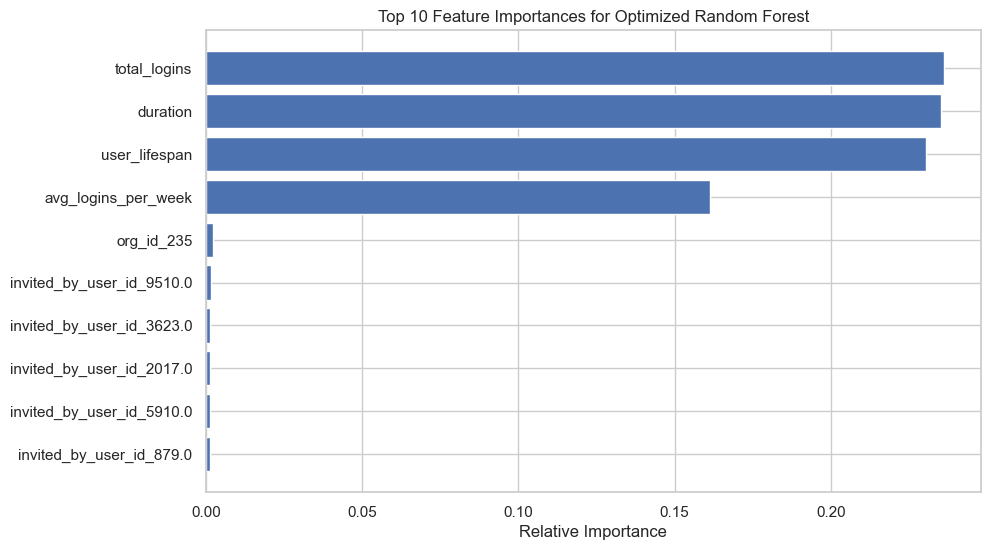

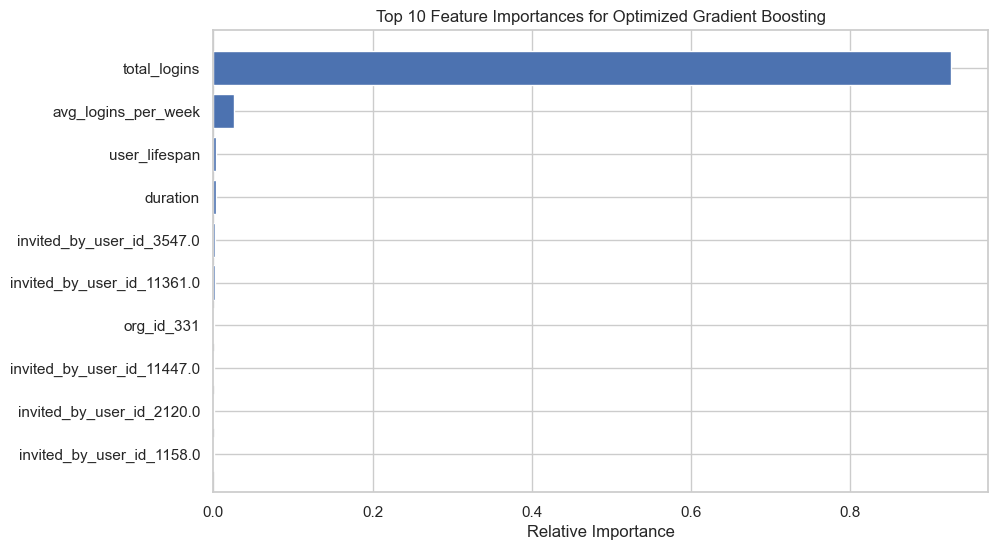

Feature importances from Optimized Random Forest:
total_logins: 0.23612588929590742
duration: 0.23524406556771302
user_lifespan: 0.23029043731642646
avg_logins_per_week: 0.16114653208800578
org_id_235: 0.0021455299125076517
invited_by_user_id_9510.0: 0.0015887627350809016
invited_by_user_id_3623.0: 0.0014868300525716603
invited_by_user_id_2017.0: 0.0014862681540214516
invited_by_user_id_5910.0: 0.0014049089720538004
invited_by_user_id_879.0: 0.0011775311565566699
invited_by_user_id_2776.0: 0.0009927600085624583
org_id_282: 0.000986941233745921
org_id_387: 0.0009105373998645021
invited_by_user_id_10163.0: 0.0008283683528742378
invited_by_user_id_7431.0: 0.0008089017450782767
invited_by_user_id_545.0: 0.0007739044985575066
creation_source_PERSONAL_PROJECTS: 0.000762304835908936
invited_by_user_id_4400.0: 0.0007482524161050753
invited_by_user_id_10294.0: 0.0007448044749563209
invited_by_user_id_5855.0: 0.0007433806507356928
invited_by_user_id_6410.0: 0.0007292014985119418
email_provider_o

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_names is already defined from the preprocessing pipeline
# feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Feature importances from Optimized Random Forest
importances_opt_rf = optimized_rf_classifier.feature_importances_

# Feature importances from Optimized Gradient Boosting
importances_opt_gb = optimized_gb_classifier.feature_importances_

# Function to plot feature importances
def plot_feature_importances(importances, model_name):
    indices = np.argsort(importances)
    top_k = 10  # Adjust to display desired number of top features

    plt.figure(figsize=(10, 6))
    plt.title(f"Top {top_k} Feature Importances for {model_name}")
    plt.barh(range(top_k), importances[indices][-top_k:])
    plt.yticks(range(top_k), [feature_names[i] for i in indices[-top_k:]])
    plt.xlabel('Relative Importance')
    plt.show()

# Plotting feature importances for Optimized Random Forest
plot_feature_importances(importances_opt_rf, "Optimized Random Forest")

# Plotting feature importances for Optimized Gradient Boosting
plot_feature_importances(importances_opt_gb, "Optimized Gradient Boosting")

# Get and print feature importance data from Optimized Random Forest model
feature_importances_opt_rf = {
    name: score for name, score in zip(feature_names, importances_opt_rf)
}
sorted_feature_importances_opt_rf = sorted(feature_importances_opt_rf.items(), key=lambda item: item[1], reverse=True)

print("Feature importances from Optimized Random Forest:")
for name, score in sorted_feature_importances_opt_rf:
    print(f"{name}: {score}")

# Get and print feature importance data from Optimized Gradient Boosting model
feature_importances_opt_gb = {
    name: score for name, score in zip(feature_names, importances_opt_gb)
}
sorted_feature_importances_opt_gb = sorted(feature_importances_opt_gb.items(), key=lambda item: item[1], reverse=True)

print("\nFeature importances from Optimized Gradient Boosting:")
for name, score in sorted_feature_importances_opt_gb:
    print(f"{name}: {score}")



# Hyperparameter Tuning and Optimized Model Analysis

## Hyperparameter Tuning Process

### Logistic Regression
- **Grid Search**: Tuned `C`, `penalty`, and `solver`.
- **Best Parameters**: `'C': 1`, `'penalty': 'l1'`, `'solver': 'liblinear'`.
- **Optimized Model**: `LogisticRegression(C=1, penalty='l1', solver='liblinear')`.

### Random Forest Classifier
- **Grid Search**: Tuned `n_estimators`, `max_depth`, and `min_samples_split`.
- **Best Parameters**: `'max_depth': 30`, `'min_samples_split': 10`, `'n_estimators': 300`.
- **Optimized Model**: `RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=300)`.

### Gradient Boosting Classifier
- **Grid Search**: Tuned `n_estimators`, `learning_rate`, and `max_depth`.
- **Best Parameters**: `'learning_rate': 0.2`, `'max_depth': 3`, `'n_estimators': 100`.
- **Optimized Model**: `GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=100)`.

### Support Vector Machine (SVM) Classifier
- **Grid Search**: Tuned `C`, `kernel`, and `gamma`.
- **Best Parameters**: `'C': 1`, `'gamma': 'scale'`, `'kernel': 'rbf'`.
- **Optimized Model**: `SVC(C=1, gamma='scale', kernel='rbf', probability=True)`.

## Evaluation of Optimized Models

### Metrics and Results
- Evaluated using Precision, Recall, F1 Score, ROC-AUC Score, Confusion Matrix, and Classification Report.
- All models showed high accuracy, precision, recall, and F1 scores, with ROC-AUC scores close to 1.
- Notable results include high precision in Logistic Regression and SVM, and a balance between precision and recall in Random Forest and Gradient Boosting.

### Considerations for Model Selection
- Choose based on specific requirements like interpretability, computational efficiency, and importance of error types (false positives vs. false negatives).

## Visualization of Feature Importances

### Approach
- Extracted and visualized the feature importances for the Optimized Random Forest and Gradient Boosting models.
- Plotted the top 10 most important features for each model.

### Key Findings
- In both models, features like `total_logins`, `duration`, `user_lifespan`, and `avg_logins_per_week` were highly influential.
- This highlights the significance of user engagement metrics in predicting user adoption.

